In [3]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pyplot import figure
import nltk
import statistics

In [3]:
# reading the steam revies csv file with pandas data frame object and storing the data frame to a variable called main_dataframe.
main_dataframe = pd.read_csv('steam_reviews.csv', sep = ',')
 
# creating a list of column names by .columns and assigning it to column_names_list variable.
column_names_list = list(main_dataframe.columns)

# displaying the list of column names
print('List of column names : ',column_names_list)

List of column names :  ['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'author.steamid', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played']


From the column names we can see there is a column named 'Unnamed: 0', a quick look at the data shows that it is an index column that won't be necessary for the analysis, so we remove that column from the dataframe.

In [4]:
# removing the Unnamed: 0 column for creating more user friendly dataset
main_dataframe.drop('Unnamed: 0', inplace = True, axis = 1)

Below we can see the parsed dtype for every column.

We also see that there are a total of 21747371 reviews in our dataframe, with 22 columns each.

We will now check if there is some missing value in the data and drop them.

In [5]:
main_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews       

In [6]:
# assigning the number of rows before dropping na values
main_dataframe_row_len_before = main_dataframe.shape[0]

# droppin the na values 
# add subsets to dropna 
# removing the na values from specific columns because last 4 columns are not used even though they might have na values
main_dataframe.dropna(subset = ['app_id','app_name','review_id','language','timestamp_created',
                               'timestamp_updated','recommended','votes_helpful','votes_funny','weighted_vote_score',
                               'comment_count','steam_purchase','received_for_free','written_during_early_access',
                               'author.steamid', 'author.num_games_owned','author.num_reviews'] , inplace= True)
# assigning the number of rows after dropping na values
main_dataframe_row_len_after= main_dataframe.shape[0]

# calculating how much rows are dropped
rows_dropped_main_dataframe = main_dataframe_row_len_before - main_dataframe_row_len_after 

In [7]:
print(rows_dropped_main_dataframe,'rows are dropped that has na values.')
# so we see that there is no na values that columns has besides the last 4 column (which we don't use) 
# with the last 4 columns we also didnt add review column because review column can be na (user can review without commenting)

0 rows are dropped that has na values.


So we came to a conclusion that besides review and last 4 columns, we don't have any na values

In [8]:
# reading the bonus dataset1
dataframe_bonus_1 = pd.read_csv('steam_reviews_bonus_1.csv', sep = ',' ,low_memory=False)

In [9]:
# creating a list of column names by .columns and assigning it to column_names_list variable.
column_names_list = list(dataframe_bonus_1.columns)

# displaying the list of column names
print('List of column names : ',column_names_list)

List of column names :  ['Unnamed: 0', 'Unnamed: 0.1', 'app_id', 'app_name', 'review_id', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'author.steamid', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played']


In [10]:
# we can see there are unneceserray columns named unnamed:0 and unnamed:0.1 columns 

# removing the Unnamed: 0 column
dataframe_bonus_1.drop('Unnamed: 0', inplace = True, axis = 1) 
# removing the Unnamed: 0.1 column
dataframe_bonus_1.drop('Unnamed: 0.1', inplace = True, axis = 1)


Below we can see the parsed dtype for every column.

We also see that there are a total of 10000004 reviews in our dataframe, with 22 columns each. Even though column names and numbers are equal to the main_dataframe, their dtypes are different. We should change the dtypes to the main_dataframe's dtypes before merging the dataframes together.

We will now check if there is some missing value in the data and drop them.

In [11]:
dataframe_bonus_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000004 entries, 0 to 10000003
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          float64
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               float64
 6   timestamp_updated               object 
 7   recommended                     object 
 8   votes_helpful                   object 
 9   votes_funny                     float64
 10  weighted_vote_score             float64
 11  comment_count                   float64
 12  steam_purchase                  object 
 13  received_for_free               object 
 14  written_during_early_access     object 
 15  author.steamid                  float64
 16  author.num_games_owned          float64
 17  author.num_reviews       

In [12]:
# assigning the number of rows before dropping na values
bonus1_dataframe_row_len_before = dataframe_bonus_1.shape[0]

# droppin the na values besides reviews and last 4 columns (which we dont use)
dataframe_bonus_1.dropna(subset = ['app_id','app_name','review_id','language','timestamp_created',
                               'timestamp_updated','recommended','votes_helpful','votes_funny','weighted_vote_score',
                               'comment_count','steam_purchase','received_for_free','written_during_early_access',
                               'author.steamid', 'author.num_games_owned','author.num_reviews'] , inplace= True)
# assigning the number of rows after dropping na values
bonus1_dataframe_row_len_after= dataframe_bonus_1.shape[0]

# calculating how much rows are dropped
rows_dropped_bonus1_dataframe = bonus1_dataframe_row_len_before - bonus1_dataframe_row_len_after 

In [13]:
print(rows_dropped_bonus1_dataframe,'rows are dropped that has na values.')

8 rows are dropped that has na values.


So we came to a conclusion that besides review and last 4 columns, we don't have any na values

In [14]:
# let's display the dataframe
dataframe_bonus_1.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030.0,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1.034411e+09,1034410880.0,True,0,0.0,...,True,False,False,7.656120e+16,367.0,10.0,1909.0,1448.0,1909.0,1.021116e+09
1,292030.0,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1.336568e+09,1336567596.0,True,0,0.0,...,False,False,False,7.656120e+16,11.0,112.0,2764.0,2743.0,2674.0,1.327515e+09
2,292030.0,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1.142145e+09,1142145175.0,True,0,0.0,...,True,False,False,7.656120e+16,53.0,1.0,1061.0,1061.0,1060.0,1.137779e+09
3,292030.0,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",9.801152e+08,980115225.0,True,0,0.0,...,True,False,True,7.656120e+16,168.0,1.0,5587.0,3200.0,5524.0,9.746538e+08
4,292030.0,The Witcher 3: Wild Hunt,85184287,schinese,大作,9.926147e+08,992614717.0,True,0,0.0,...,True,False,False,7.656120e+16,4.0,14.0,217.0,42.0,217.0,9.830412e+08


In [15]:
# now we concluded that there was no na values that we''ll work in bonus dataframe 
# After dropping them, next we change dtypes of the columns.
# we change the dtypes to their main_dataframe equivalent ones.

In [16]:
# as we could see in the dataframe info before, timestamp_updated columns dtype is object with float values.
# so in order to convert the values succesfully we first should convert object to float, and after to integer.

dataframe_bonus_1['timestamp_updated']=dataframe_bonus_1['timestamp_updated'].astype('float64')
dataframe_bonus_1['timestamp_updated']=dataframe_bonus_1['timestamp_updated'].astype('int64')

In [17]:
# the other dtypes can be converted only with one step
# Converting the dtypes
dataframe_bonus_1 = dataframe_bonus_1.astype({"app_id": int, "timestamp_created": int, "recommended": bool, "votes_helpful":int, 
                          "votes_funny":int, "comment_count": int, "steam_purchase": bool, "received_for_free": bool, 
                          "written_during_early_access": bool, "author.steamid": int, "author.num_games_owned": int, 
                          "author.num_reviews": int})


In [18]:
# as we can see all the dtypes are converted succesfully
dataframe_bonus_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999996 entries, 0 to 10000003
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews        

In [19]:
# reading the bonus dataset2
dataframe_bonus_2 = pd.read_csv('steam_reviews_bonus_2.csv', sep = ',' ,low_memory=False)

In [20]:
# creating a list of column names by .columns and assigning it to column_names_list variable.
column_names_list = list(dataframe_bonus_2.columns)

# displaying the list of column names
print('List of column names : ',column_names_list)

List of column names :  ['Unnamed: 0', 'Unnamed: 0.1', 'app_id', 'app_name', 'review_id', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'author.steamid', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played']


We follow the same steps for dataframe_bonus_2 as well as dataframe_bonus_1
With only exception that dataframe_bonus_2 has unnamed: 0.1 column as well as unnamed:0 column.
We remove both of those.

In [21]:
dataframe_bonus_2.drop('Unnamed: 0', inplace = True, axis = 1) # removing the Unnamed: 0 column for creating more user friendly dataset
dataframe_bonus_2.drop('Unnamed: 0.1', inplace = True, axis = 1) # removing the Unnamed: 0 column for creating more user friendly dataset


We should remove the na values and
After we change the dtypes as well like we did before

In [22]:
# removing the na subsets of each given column
dataframe_bonus_2.dropna(subset = ['app_id','app_name','review_id','language','timestamp_created',
                               'timestamp_updated','recommended','votes_helpful','votes_funny','weighted_vote_score',
                               'comment_count','steam_purchase','received_for_free','written_during_early_access',
                               'author.steamid', 'author.num_games_owned','author.num_reviews'] , inplace= True)

In [23]:
# we check the dtypes
dataframe_bonus_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999996 entries, 0 to 7000003
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          float64
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               float64
 6   timestamp_updated               object 
 7   recommended                     object 
 8   votes_helpful                   object 
 9   votes_funny                     float64
 10  weighted_vote_score             float64
 11  comment_count                   float64
 12  steam_purchase                  object 
 13  received_for_free               object 
 14  written_during_early_access     object 
 15  author.steamid                  float64
 16  author.num_games_owned          float64
 17  author.num_reviews         

In [24]:
dataframe_bonus_2['timestamp_updated']=dataframe_bonus_2['timestamp_updated'].astype('float64')
dataframe_bonus_2['timestamp_updated']=dataframe_bonus_2['timestamp_updated'].astype('int64')

In [25]:
# changing the dtypes
dataframe_bonus_2 = dataframe_bonus_2.astype({"app_id": int, "timestamp_created": int, "recommended": bool, "votes_helpful":int, 
                          "votes_funny":int, "comment_count": int, "steam_purchase": bool, "received_for_free": bool, 
                          "written_during_early_access": bool, "author.steamid": int, "author.num_games_owned": int, 
                          "author.num_reviews": int})


In [26]:
# displaying bonus 2 dataframe 
dataframe_bonus_2.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,252950,Rocket League,53011669,spanish,juegaoz,1560381544,1560381544,True,0,1,...,True,True,True,76561197955885920,200,2,32539.0,415.0,2367.0,1.553751e+09
1,252950,Rocket League,53011639,spanish,El juego perfecto para todo amante del Futbol ...,1221076632,1221076632,True,0,0,...,True,True,True,76561197889360384,3,1,104293.0,0.0,81336.0,1.216889e+09
2,252950,Rocket League,53011606,dutch,dis geim very gud,978758528,978758528,True,2,1,...,True,True,True,76561197882134736,9,15,36262.0,0.0,31369.0,9.705828e+08
3,252950,Rocket League,53011596,english,It's all fun and games until it's you versus y...,1565558703,1565558703,True,2,0,...,True,True,True,76561197868805184,65,2,34361.0,0.0,33888.0,1.552424e+09
4,252950,Rocket League,53011567,english,"Everytime when I think rockey league is fun, m...",1499632396,1499632396,True,0,0,...,True,True,True,76561197896821376,115,7,37264.0,202.0,27925.0,1.488265e+09


Merging the datasets together

In [27]:
# creating a list of dataframes to merge
dataframes = [main_dataframe, dataframe_bonus_1, dataframe_bonus_2]

In [28]:
# concatenating those lists to a single dataframe
dataframe = pd.concat(dataframes)

In [29]:
# total number of rows before removing duplicates
preprocessed_dataframe_length = dataframe.shape[0]

In [30]:
# removing duplicates
# we are keeping the last value if we see a duplicate because the last one is the closest one to present
dataframe = dataframe.drop_duplicates(subset = ['review','timestamp_created','timestamp_updated','author.steamid'], keep="last")

In [31]:
# total number of rows after removing duplicates
postprocessed_dataframe_length = dataframe.shape[0]

In [32]:
num_duplicate_dataframe = preprocessed_dataframe_length-postprocessed_dataframe_length

In [33]:
print('There was {} rows that were duplicates'.format(num_duplicate_dataframe))

There was 135196 rows that were duplicates


So we came to conclusion that there were 135196 duplicate rows but we only checked the column values of : 
   
    - Review ( Authors comment about the game )
    - Timestamp_created ( The time author has first reviewed the game )
    - Timestamp_updated ( The time author has first updated the review )
    - Author.steamid ( The id of the author that has reviewed the app )
So actually there might be some same reviews that are created in the same time and has been updated in the same time by the same author, even though this possibility is almost impossible, in this dataframe this might exist.
We assumed that this is a mistake by and disregarded the possibility fully.
In the next chapter we'll see what is the number if we wouldn't.
In other words, in the next chapter we'll see that what is the total rows number if we would check all the column values
and drop rows if all the column values are equal in a given row.


In [34]:
# creating the test dataframe
testframe = pd.concat(dataframes)

In [35]:
# removing duplicates
testframe = testframe.drop_duplicates(keep="last")

In [36]:
# total number of rows after removing duplicates
postprocessed_testframe_length = testframe.shape[0]

In [37]:
num_duplicate_testframe = preprocessed_dataframe_length - postprocessed_testframe_length 

In [38]:
print('There was {} rows that were duplicates\nThe number of rows different between two dataframe is: {}'.format(num_duplicate_testframe,
                                            (postprocessed_testframe_length - postprocessed_dataframe_length)))

There was 134927 rows that were duplicates
The number of rows different between two dataframe is: 269


In conclusion, there are 269 rows that has the same review, timestamp_create and timestamp_update where other column values are different. 
In this approach, we take that as a data storing mistake so we remove all that 269 rows. 
In our thinking of a dataset:
        
            - If there is a review, with certain comment and has been posted on a certain time and also updated 
            on some certain time by a certain author, that review should be unique with all of its values. 
            - There might be a same comment posted by two different indivuals at the same time, but also its not 
            likely to update the same comment at the same time again.
            - In this approach we assume that should be a some sort of dataset problem and we remove those rows.

So finally, our dataframe is set and ready to use. 
In the next chapter we'll do exploratory data analysis to discover insights about the data before moving on to next part.

# RQ1 - EXPLORATORY DATA ANALYSIS

In [41]:
dataframe.app_name # reading only the app_name tabular data 

0          The Witcher 3: Wild Hunt
1          The Witcher 3: Wild Hunt
2          The Witcher 3: Wild Hunt
3          The Witcher 3: Wild Hunt
4          The Witcher 3: Wild Hunt
                     ...           
6999999                   Frostpunk
7000000                   Frostpunk
7000001                   Frostpunk
7000002                   Frostpunk
7000003                   Frostpunk
Name: app_name, Length: 38612436, dtype: object

In [42]:
# Univeriate Analysis is when we analyse just one column from a dataset. We are going to analyse and visualise one column now.
# The column we've chosen for Univeriate Analysis is 'app_name' column
# If the column has unordered data categorical data, It is called unordered variable.
# In this specific case, we've chosen 'app_name' column and this column contains different type of game names.
# We didn't define any order amongst the games so this tabular data has been displayed as unordered univariate analysis.
# For the next step we will analyse the game names categorically by using plots. 

# First we discover how many different type of games are there in the dataset.
dataframe['app_name'].nunique()

315

In [43]:
# There are 315 different games with different percentages, we only need the ones who have high dominancy over the dataset.
# We can take the top 10, 20 and 30 most reviewed games as an example.
# First lets see the list of the top 10 most reviewed games on steam dataset.
top10_names = dataframe['app_name'].value_counts()[:10].index.tolist()
print('Number of Top 10 Most Reviewed Applications')
for i in range(len(top10_names)):
    print((i+1),'-',top10_names[i])

Number of Top 10 Most Reviewed Applications
1 - PLAYERUNKNOWN'S BATTLEGROUNDS
2 - Grand Theft Auto V
3 - Tom Clancy's Rainbow Six Siege
4 - Garry's Mod
5 - Rust
6 - Rocket League
7 - Among Us
8 - The Witcher 3: Wild Hunt
9 - Dead by Daylight
10 - ARK: Survival Evolved


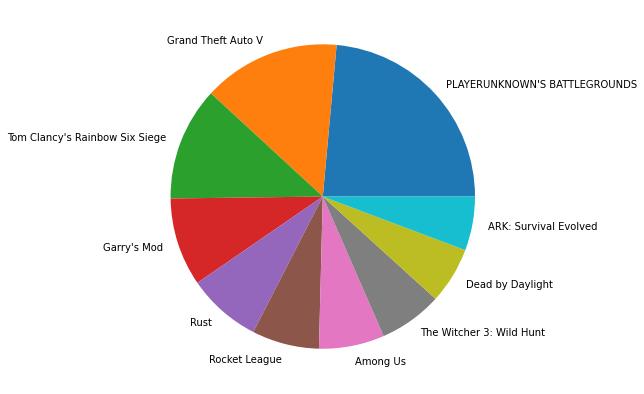

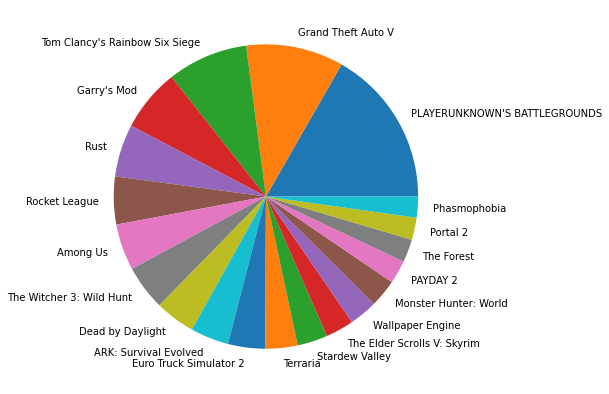

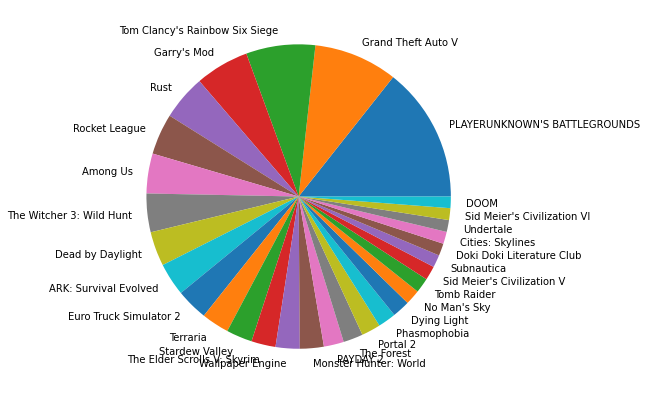

In [44]:
for i in range (3):
    n = (i+1)*10
    # As shown below, when we look at the top 10, top 20 and top 30 games 
    top_names = dataframe['app_name'].value_counts()[:n].index.tolist()

    # After we store the values percentages of each game to a list variable.
    top_values = list(dataframe.app_name.value_counts(normalize=True).head(n))

    # Values need to be normalised because on pyplot, if the values doesn't sum up to 1, pie chart cannot be displayed complete.
    # Normalising total value to sum to more than 1.
    top_values = [slices/max(top_values) for slices in top_values]

    # Creating the pie chart
    fig = plt.figure(figsize =(10, 7))
    plt.pie(top_values, labels = top_names)
    plt.show()
    
# When we look at the pie chart we can clearly see that PlayerUnknown's Battlegrounds, Grand Theft Auto V dominates the chart
# All the other games on the pie chart almost has the same weight over pie chart besides Tom Clancy's Rainbow Six Siege having 
# slightly higher share on the chart.
# Even though the first two pie chart can seem just fine, the results can be misleading since we picked only top 10, 20 and 30



In [45]:
# This brings a question that what if the runner up games also almost had the same weight as the last games on the list. 
# So ranking by a specified number is not a good choice. Also pie chart is not a good choice to visualise this sort of data 
# because lot of games cross on the chart after some point and the labels cannot be read. 
# This cannot be a good indication to interpret the data. We should set a boundary based on percentages and use bar charts.

# RQ2 - EXPLORING THE DATASET BY FINDING SIMPLE INSIGHTS INTO THE REVIEWS.

 ## Plot the number of reviews for each application in descending order.


In [46]:
# counting the number of reviews for each app_name 
app_name_series = dataframe.app_name.value_counts()

In [50]:
# turning app_name series to dataframe
app_name_df = pd.DataFrame(app_name_series)

In [51]:
# getting the app_name values by half because 315 is the total application names and its too many to plot
app_name_df1 = pd.DataFrame(app_name_df)[0:157]
app_name_df2 = pd.DataFrame(app_name_df)[157:len(app_name_df)]

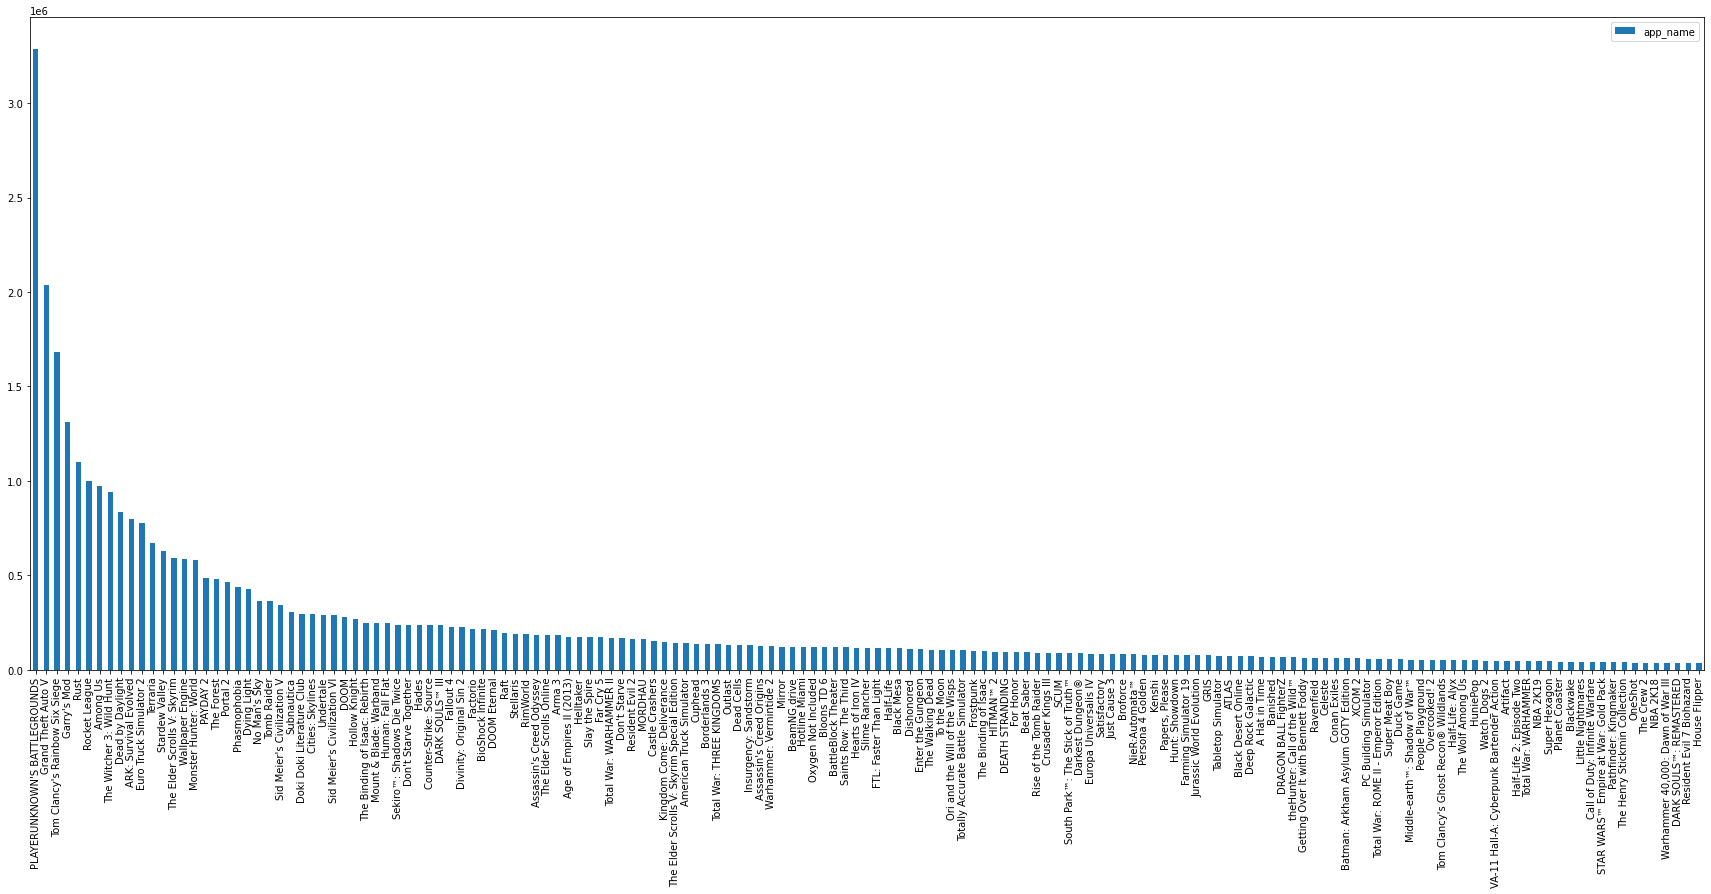

In [54]:
# plotting the first half
app_name_df1.plot.bar(figsize=(30, 12))

plt.show()

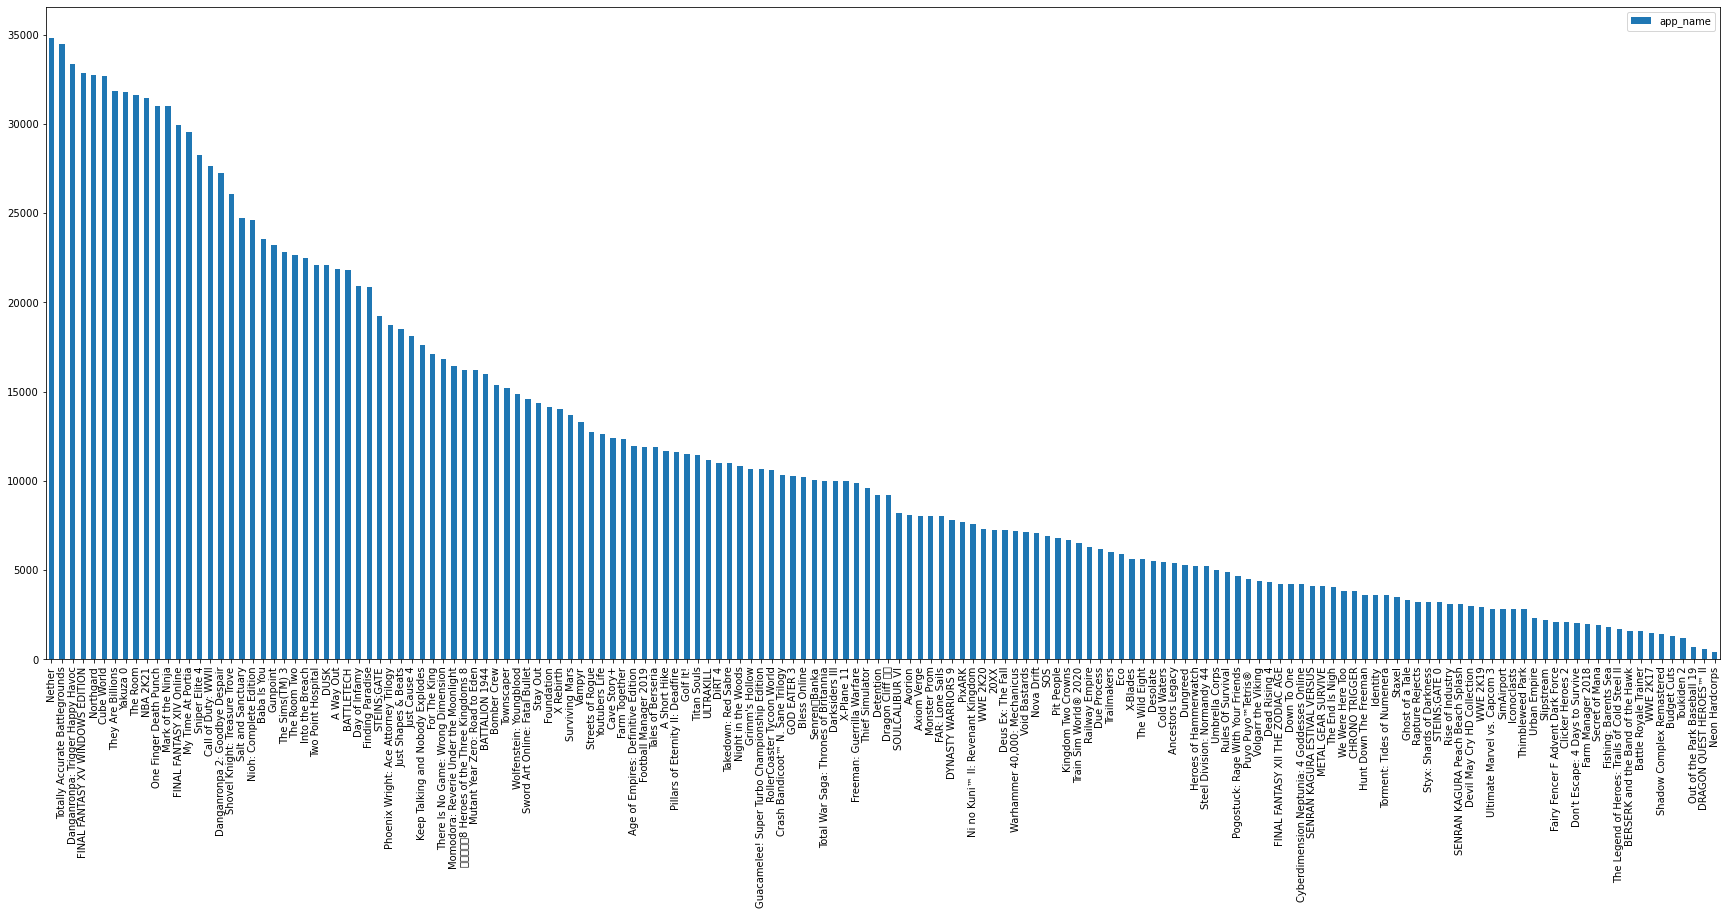

In [55]:
#plotting the second half
app_name_df2.plot.bar(figsize=(30, 12))

plt.show()

## What applications have the best Weighted Vote Score?

In [56]:
# grouping app_names and weighted scores and getting the max weighted score value for each application
scores = dataframe.groupby('app_name')['weighted_vote_score'].max()

In [57]:
# getting app_names list 
app_names = dataframe['app_name'].value_counts().index.tolist()

In [58]:
# sorting the app_names list because on scores series, app_names are sorted by their aplhabetical order
app_names.sort()

In [59]:
# assigning each scores to app_names 
score_df = pd.DataFrame(scores, app_names)

In [60]:
# sorting the values from highest to lowest
score_df = score_df.sort_values(['weighted_vote_score'], ascending=False)

In [61]:
# user can choose to 'n' number of best weighted scores to display
n = 15
score_df.iloc[0:n]
# find the best weighted scores and applications 

,weighted_vote_score
Stardew Valley,0.995987
Divinity: Original Sin 2,0.995245
Subnautica,0.994453
Mirror,0.994038
Wallpaper Engine,0.993540
Terraria,0.992892
The Forest,0.992581
Monster Hunter: World,0.992500
The Elder Scrolls Online,0.992356
Human: Fall Flat,0.992336


## Which applications have the most and the least recommendations?


In [62]:
# grouping recommended values by app_name
rec_values = dataframe.groupby(['app_name', 'recommended']).size()

In [63]:
# for each game recommended values series has true and false values, we turn this series to list
rec_values = rec_values.tolist()

In [64]:
# choosing only true values from the list and assigning it to a rec_numbers variable 
rec_numbers = rec_values[1::2]

# str values for most and least recommended app
most_rec_app_name = ''
least_rec_app_name = ''

In [65]:
# finding max and least recommended numbers
most_rec = max(rec_numbers)
least_rec = min(rec_numbers)

In [66]:
# creating a list that has each app name sorted 
app_names = dataframe['app_name'].value_counts().index.tolist()
app_names.sort()

In [67]:
# if most_rec numbers is equals to recommended numbers list
# assign the same indexes app_name to most recommended variable
# and vice versa is true for the min value
for i in range(len(rec_numbers)):
    if(rec_numbers[i] == most_rec):
        most_rec_app_name = app_names[i]
    if(rec_numbers[i] == least_rec):
        least_rec_app_name = app_names[i]

In [68]:

print('{} is the most recommended application with {} recommendations and\n{} is the least recommended application with {} recommendations'.format(most_rec_app_name,most_rec, least_rec_app_name, least_rec))


PLAYERUNKNOWN'S BATTLEGROUNDS is the most recommended application with 1772834 recommendations and
Neon Hardcorps is the least recommended application with 178 recommendations


## How many of these applications were purchased, and how many were given for free?


In [69]:
# getting the number of received for free == True value 
most_rec_received_for_free = dataframe[dataframe["app_name"] == most_rec_app_name].received_for_free.value_counts().get(True)

# getting the number of steam_purchase  == True
most_rec_purchased = dataframe[dataframe["app_name"] == most_rec_app_name].steam_purchase.value_counts().get(True)

# and the same goes for the least recommended app
least_rec_received_for_free = dataframe[dataframe["app_name"] == least_rec_app_name].received_for_free.value_counts().get(True)
least_rec_purchased = dataframe[dataframe["app_name"] == least_rec_app_name].steam_purchase.value_counts().get(True)

In [70]:
print('{} is the most recommended app with\n{} free receives &\n{} purchases\n'.format(most_rec_app_name,
                                                        most_rec_received_for_free, most_rec_purchased))
print('{} is the least recommended app with\n{} free receives &\n{} purchases'.format(least_rec_app_name,
                                                        least_rec_received_for_free, least_rec_purchased))

PLAYERUNKNOWN'S BATTLEGROUNDS is the most recommended app with
1705696 free receives &
3016974 purchases

Neon Hardcorps is the least recommended app with
227 free receives &
229 purchases


# RQ3 - NOW IT'S IMPORTANT TO UNDERSTAND THE PREFERRED TIME TO DO REVIEWS.

## What is the most common time that authors review an application? For example, authors usually write a review at 17:44.


In [71]:
# converting timestamp_created value to datetime and assigning to a dataframe variable
df = pd.to_datetime(dataframe['timestamp_created'], unit='s').to_frame()


In [72]:
# only getting the time and removing the days, months etc.
df['timestamp_created'] = pd.to_datetime(df['timestamp_created']).dt.time


In [73]:
# removing the seconds from the dataframe
time_created_df = df['timestamp_created'].apply(lambda t: t.strftime('%H:%M')).to_frame()

In [74]:
# grouping each time together and counting their frequencies
most_common_review_time = time_created_df.groupby('timestamp_created').timestamp_created.count()


In [75]:
# finding the most common time
most_common_review_time = most_common_review_time.idxmax()

In [76]:
print('Most common time that authors review an application is at:',most_common_review_time)

Most common time that authors review an application is at: 14:50


## Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.


In [87]:
def time_interval_plot(starting_intervals_list, ending_intervals_list):
    
    # getting the timestamp_created values
    tf = pd.to_datetime(dataframe['timestamp_created'], unit='s').to_frame()
    
    # turning datetime to hours minutes and seconds
    gf = tf['timestamp_created'].apply(lambda t: t.strftime('%H:%M:%S'))
    # turning into a list and sorting it based on time values to search
    review_times_list = gf.tolist()
    review_times_list.sort()    
    # for the xlabel of plot bar getting the time values
    times = [' - '.join(s) for s in zip(starting_intervals_list, ending_intervals_list)]
    
    # number of reviews for each time interval, we create a empty list to store the numbers for each time interval
    num_reviews_list = []
    
    for i in range(len(starting_intervals_list)):
        # getting the index of the starting and ending time interval
        start_index = review_times_list.index(starting_intervals_list[i])
        end_index = review_times_list.index(ending_intervals_list[i])
        # because the list is sorted, 00:00:00 will be the first value but when we search, it cannot be the first one
        # so if the end index is the first one which is zero, we turn it to a last index which is the length of the list
        if(end_index == 0):
            end_index = len(review_times_list)
        # appending values for each time interval to a list
        num_reviews_list.append(len(review_times_list[start_index : end_index]))
    
    # plotting 
    figure(figsize=(15, 8), dpi=80)
    plt.xlabel('time intervals')
    plt.ylabel('number of reviews in million')
    bar_plot = plt.bar(times, num_reviews_list, color = ['#00BFFF', '#00B2EE', '#009ACD', '#1E90FF', '#1C86EE', '#1874CD', '#00688B'], edgecolor = 'black')
    plt.show()
    return


In [88]:
# list of starting and ending time intervals, ending ones are not considered in the list slicing
# so the ending intervals only include until a second before its given time 
starting_intervals_list = ['06:00:00','11:00:00','14:00:00','17:00:00','20:00:00','00:00:00','03:00:00']
ending_intervals_list = ['11:00:00','14:00:00','17:00:00','20:00:00','00:00:00','03:00:00','06:00:00']

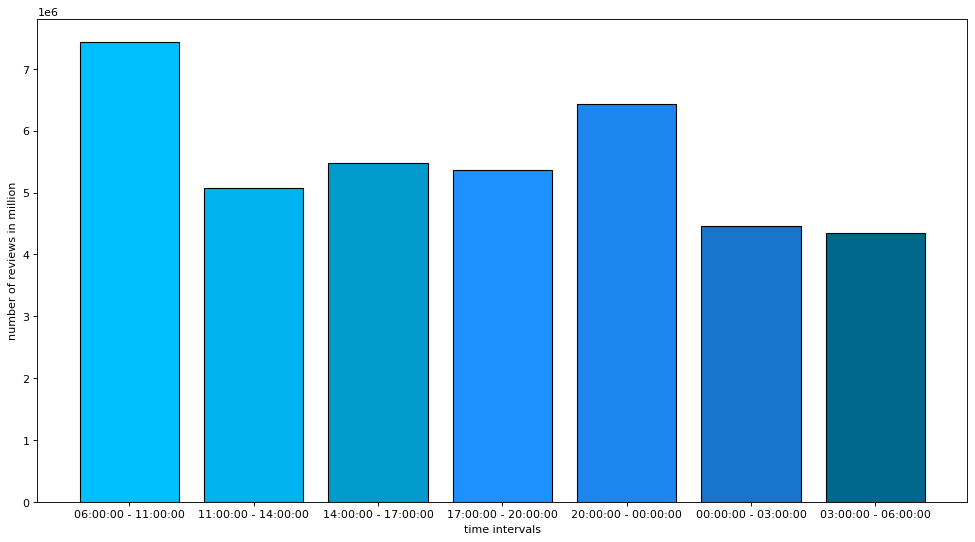

In [89]:
time_interval_plot(starting_intervals_list, ending_intervals_list)

# RQ4 - AS STEAM IS A WORLDWIDE PLATFORM, THE REVIEWS CAN BE DONE IN MANY LANGUAGES. LET'S EXTRACT SOME INFORMATION ABOUT IT.


## What are the top 3 languages used to review applications?


In [91]:
# finding the frequencies for each language 
lang_freq = nltk.FreqDist(dataframe['language'])

# getting the top3 languages from the list and converting it back to dataframe
lang_top3=pd.DataFrame(list(lang_freq.items())).sort_values(by=1, ascending = False)[0:3]

# renaming the dataframe
lang_top3.rename(columns={0: 'language', 1: 'number of times reviewed'}, inplace=True)

In [92]:
# converting series to list
lang_top3_list = lang_top3['language'].tolist()

In [93]:
# printing the top3 in order
for i in range(3):
    print((i+1),'-',lang_top3_list[i])

1 - english
2 - schinese
3 - russian


## Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.


In [94]:
def FilterData(df, languages):
    # creating an empty dataframe
    filtered_df = pd.DataFrame()
    
    # creating series for the review, language, votes_helpful and votes_funny of the dataframe
    # we added votes_helpful and funny to use it later 
    review_series = dataframe['review']
    lang_series = dataframe['language']
    vote_help_series = dataframe['votes_helpful']
    vote_funny_series = dataframe['votes_funny']
    
    # renaming the series column names
    review_series = pd.Series(review_series, name="review")
    lang_series = pd.Series(lang_series, name="language")
    vote_help_series = pd.Series(vote_help_series, name="helpful")
    vote_funny_series = pd.Series(vote_funny_series, name="funny")
    
    # creating a dataframe from only this series
    temp_df = pd.concat([review_series, lang_series, vote_help_series, vote_funny_series], axis=1)
    
    # if the dataframe's related data coincides with one of the top3 lang, filter it to the dataframe we already have 
    for language in languages:
        filtered_df = filtered_df.append(temp_df[temp_df['language'] == language])
    
    return filtered_df

In [95]:
# languages we picked randomly, it can be top3 or not, or more than 3, or even less.
language_list=['english','turkish','italian']

# returned data frame from the function
filtered_frame = FilterData(dataframe, language_list) 

In [96]:
# picking the language and review column and assigning it to a new dataframe
languages_filtered_df = filtered_frame[['language','review']]

In [97]:
# displaying the dataframe
languages_filtered_df

,language,review
3,english,"One of the best RPG's of all time, worthy of a..."
5,english,"good story, good graphics. lots to do."
6,english,"dis gud,"
18,english,favorite game of all time cant wait for the Ne...
20,english,Why wouldn't you get this
...,...,...
6999363,italian,Dagli stessi sviluppatori di This War of Mine ...
6999537,italian,E' un titolo eccezionale. Ti trasmette la prec...
6999866,italian,"Direi il gioco più bello dell'anno, soprattutt..."
6999877,italian,11bit studio non sbaglia un colpo. Lo spunto è...


## Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?


In [98]:
# filtering the top3 languages from the dataframe
top_df = FilterData(dataframe, lang_top3_list)

In [99]:
# getting the values that are voted as funny
funnies = top_df[top_df['funny']>0]


In [100]:
# getting the number of funny votes 
num_funnies = funnies.funny.shape[0]

In [101]:
# getting the total number of votes either voted funny or not
total_funnies = top_df.funny.shape[0]

In [102]:
# calculating the percentage
funnies_percentage = (num_funnies/total_funnies)*100 

In [103]:
# printing the results
print('{:.2f}% of the reviews voted as funny amongst the top {} languages given.'.format(funnies_percentage, len(lang_top3_list)))
for i in range (len(lang_top3_list)):
    num_funnies_lang = funnies[funnies['language'] == lang_top3_list[i]].funny.shape[0]
    total_funnies_lang = top_df[top_df['language'] == lang_top3_list[i]].funny.shape[0]
    funnies_lang_percentage = (num_funnies_lang/total_funnies_lang)*100
    print('Reviews in {} has {:.2f}% of reviews voted as funny'.format(lang_top3_list[i], funnies_lang_percentage))

11.82% of the reviews voted as funny amongst the top 3 languages given.
Reviews in english has 11.29% of reviews voted as funny
Reviews in schinese has 11.62% of reviews voted as funny
Reviews in russian has 14.31% of reviews voted as funny


## Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?


In [104]:
# getting the values that are voted as helpful
helpfuls = top_df[top_df['helpful']>0]

# getting the number of helpful votes 
num_helpfuls = helpfuls.helpful.shape[0]

# getting the total number of votes either voted helpful or not
total_helpfuls = top_df.helpful.shape[0]

# calculating the percentage
helpfuls_percentage = (num_helpfuls/total_helpfuls)*100

# printing the results
print('{:.2f}% of the reviews voted as helpful amongst the top {} languages given.'.format(helpfuls_percentage, len(lang_top3_list)))
for i in range (len(lang_top3_list)):
    num_helpfuls_lang = helpfuls[helpfuls['language'] == lang_top3_list[i]].helpful.shape[0]
    total_helpfuls_lang = top_df[top_df['language'] == lang_top3_list[i]].helpful.shape[0]
    helpfuls_lang_percentage = (num_helpfuls_lang/total_helpfuls_lang)*100
    print('Reviews in {} has {:.2f}% of reviews voted as helpful'.format(lang_top3_list[i], helpfuls_lang_percentage))
    

28.14% of the reviews voted as helpful amongst the top 3 languages given.
Reviews in english has 28.12% of reviews voted as helpful
Reviews in schinese has 26.04% of reviews voted as helpful
Reviews in russian has 31.69% of reviews voted as helpful


# RQ5 - The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

## Plot the top 10 most popular reviewers and the number of reviews.


We consider being popular is as having the total highest votes_helpful + votes_funny number </br>
So now we create a new dataframe and assign the values

In [105]:
# creating a dataframe and assigning values of votes_helpful + votes_funny
popularity_dataframe = pd.DataFrame(columns =['author.steamid','popularity'])
popularity_dataframe['popularity'] = dataframe['votes_funny'] + dataframe['votes_helpful']  
# assigning the steamer id values to new dataframe
popularity_dataframe['author.steamid'] = dataframe['author.steamid']

In [106]:
# grouping the popularity by the same author steam id and adding popularity values togetger
authors_popularity = popularity_dataframe.groupby('author.steamid').agg({'popularity':'max'})

In [107]:
# sorting the authors popularity in descending order 
best_authors = authors_popularity.sort_values(by = 'popularity', ascending = False)

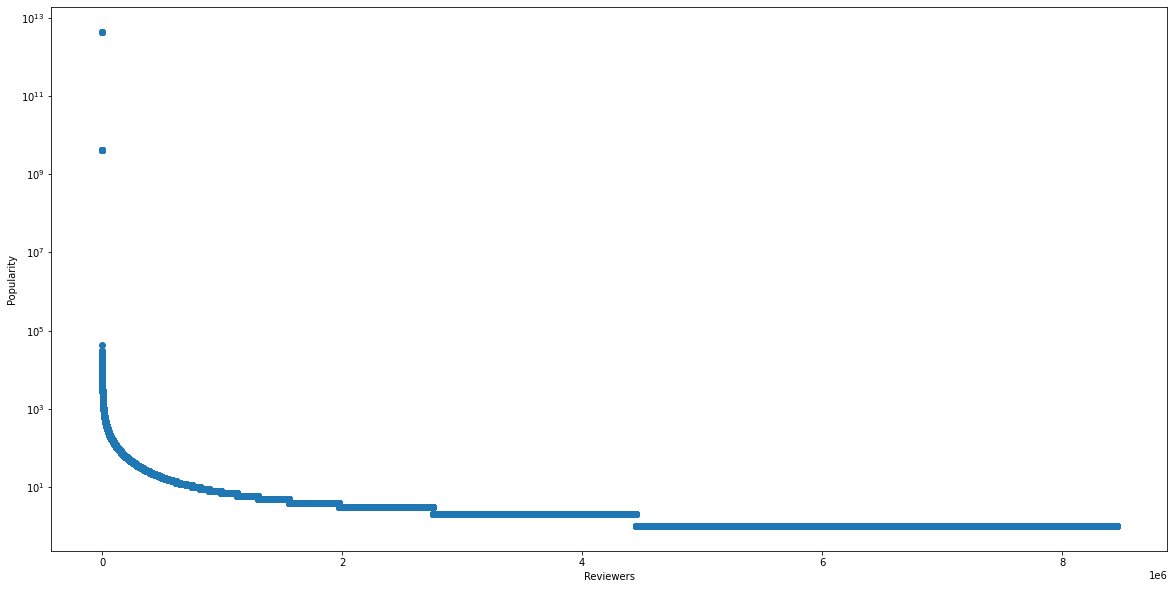

In [108]:
#removing authors with zero popularity for convenience in plotting
best_authors = best_authors[best_authors['popularity'] > 0]
fig, axs = plt.subplots(figsize = (20,10))

axs.scatter(np.arange(best_authors.shape[0]), best_authors.values)
axs.set_ylabel('Popularity')
axs.set_xlabel('Reviewers')
axs.set_yscale('log')
plt.show()

Because of some mistake there are some reviewers that has billions of votes </br>
That's seems wrong so we remove those from our dataframe

In [109]:
#removing outliers (from the plot popularity over 10^9 seems unreasonable to us)
best_authors = best_authors[best_authors['popularity'] < 10**9] 

In [110]:
num_reviews = []
print('Top 10 Reviewers List')
for i in range(10):
    print(i+1,' - ',best_authors.index[i])
    temp=dataframe[dataframe['author.steamid'] == best_authors.index[i]]
    num_reviews.append(temp['author.num_reviews'].max())

Top 10 Reviewers List
1  -  76561198035100704
2  -  76561198290310711
3  -  76561198301163938
4  -  76561197929275744
5  -  76561198027414971
6  -  76561197861087792
7  -  76561198301678331
8  -  76561198434676684
9  -  76561198059761824
10  -  76561198354182544


In [111]:
# getting the most popular author which is the first index of the best_authors
most_popular_reviewer_id = best_authors.index[0]

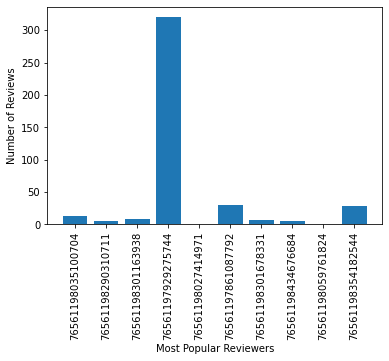

In [112]:
fig, axs = plt.subplots()

axs.bar(np.arange(10), num_reviews)
axs.set_xticks(np.arange(10))
axs.set_ylabel('Number of Reviews')
axs.set_xlabel('Most Popular Reviewers')
axs.set_xticklabels(best_authors.index[:10], rotation=90)


plt.show()

## What applications did the most popular author review?


In [113]:
reviews_popular_author = dataframe[dataframe['author.steamid'] == most_popular_reviewer_id]
# Picking all the rows with reviews made by the most_popular_reviewer_id
# The functions picks only the rows that respond 'True' if their author is most_popular_reviewer_id
reviewed_applications = reviews_popular_author['app_name'].tolist()
#listing every application the most popular reviewer reviewed
print('Most popular authors reviews')
for i in range(len(reviewed_applications)):
    print('{}. {}'.format(i+1, reviewed_applications[i]))

Most popular authors reviews
1. The Witcher 3: Wild Hunt
2. Salt and Sanctuary
3. Sekiro™: Shadows Die Twice
4. Undertale
5. BioShock Infinite
6. PLAYERUNKNOWN'S BATTLEGROUNDS
7. DARK SOULS™ III
8. Watch_Dogs 2


## How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.


In [114]:
# creating a dataframe that contains only the datas from the most popular reviewer
author_frame = dataframe[dataframe['author.steamid'] == most_popular_reviewer_id]

# dropping the same application names 
# because he might have reviewed the same application more than once
author_frame = author_frame.drop_duplicates(subset = "app_name")

# getting his purchased games and free received games to a list 
author_purchase_list = author_frame['steam_purchase'].tolist()
author_free_list = author_frame['received_for_free'].tolist()

# author_purchase_list has consists of values true and false
# if we sum up the values inside list we get the total number of true values
author_num_purchased = sum(author_purchase_list)
author_num_free = sum(author_free_list)

# getting how many total reviews he did by 
# getting the number of rows for author_frame dataframe
# we just created for only the most popular author
total_reviews = author_frame.shape[0]

# percentage calcualations for both free and purchased
purchase_percentage = (author_num_purchased / total_reviews)*100
free_percentage = (author_num_free / total_reviews)*100

print("The user purchased {} games and received {} games for free.".format(author_num_purchased, author_num_free),
      "\nPurchased games are {:.2f}% and free received games are {:.2f}% of the total reviews"
      .format(purchase_percentage, free_percentage))

The user purchased 8 games and received 0 games for free. 
Purchased games are 100.00% and free received games are 0.00% of the total reviews


## How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?


In [115]:
# getting the list of recommendations of the author
author_recommended_list = author_frame['recommended'].tolist()

In [116]:
# variables for each entity of the rq to store 
num_positive_review = 0
num_negative_review = 0
num_free_positive_review = 0
num_free_negative_review = 0

In [117]:
# searching the list by purchase and and free receives. 
# after searching again if its been recommended or not 
# incrementing it by one
for i in range(len(author_purchase_list)):
    if(author_purchase_list[i] == True):
        if(author_recommended_list[i] == True):
            num_positive_review+=1
        else:
            num_negative_review+=1
    if(author_free_list[i] == True):
        if(author_recommended_list[i] == True):
            num_free_positive_review+=1
        else:
            num_free_negative_review+=1

In [118]:
print('User reviewed {} times positively and {} times negatively for his purchases.'.format(num_positive_review,num_negative_review),
'\nUser reviewed {} times positively and {} times negatively for received free games'.format(num_free_positive_review, num_free_negative_review))


User reviewed 6 times positively and 2 times negatively for his purchases. 
User reviewed 0 times positively and 0 times negatively for received free games


# RQ6 - IT'S TIME TO GET INFORMATION FROM THE UPDATES THAT A USER DOES TO HIS REVIEWS.

## What is the average time (days and minutes) a user lets pass before he updates a review?


In [119]:
# storing the time difference for each review in a  temp list
templist = (dataframe['timestamp_updated'] - dataframe['timestamp_created']).tolist()


In [120]:
# removing the zero values, because then it means it's never been updated
templist = list(filter((0).__ne__, templist))

In [121]:
# removing the 1 values because it can be a steam glitch, generally updating a review after a sec is not really possible
templist = list(filter((1).__ne__, templist))

In [122]:
# calculating the average time passed
avg_time_passed = sum(templist) / len(templist)

In [123]:
# formatting the epoch time to datetime
value = datetime.fromtimestamp(avg_time_passed)

In [124]:
# calculating how many days have passed since the epoch starting time (by default its 01-01-1970)
days_passed = (value - datetime(1970,1,1)).days

In [125]:
# calculating how many minutes passed by 
# just reaching the value we converted before
minutes_passed = (value.second/60)+value.minute+(value.hour*60)

In [126]:
print('On average, {} days and {:.3f} minutes passes before a user updates their review.'.format(days_passed, minutes_passed))

On average, 184 days and 620.017 minutes passes before a user updates their review.


## Plot the top 3 authors that usually update their reviews.


In [127]:
# getting the authors steamid and storing it as series
author_id_series = dataframe['author.steamid']

In [128]:
# counting the update time values
update_count_series = dataframe['timestamp_updated'] - dataframe['timestamp_created']

In [129]:
# creating series for each of author id and updated values
a_series = pd.Series(author_id_series, name="Author_id")
u_series = pd.Series(update_count_series, name="Updated")

# creating a new dataframe from those two series
author_update_dataframe = pd.concat([a_series, u_series], axis=1)

In [130]:
# if the author update time is more than 1 it means that author updated.
# so we don't count the difference 1 as a value since we assumed its a mistake on steams side
author_update_dataframe = author_update_dataframe[author_update_dataframe.Updated > 1]


In [131]:
# getting the frequency of the authors of updating the review
author_freq = nltk.FreqDist(author_update_dataframe['Author_id'])

In [132]:
# getting top 3 authors
top3_authors = pd.DataFrame(list(author_freq.items())).sort_values(by=1, ascending = False)[0:3]

In [133]:
# renaming the column to create more user friendly dataframe
top3_authors.rename(columns={0: 'Author_id', 1: 'Number of Updates'}, inplace=True)

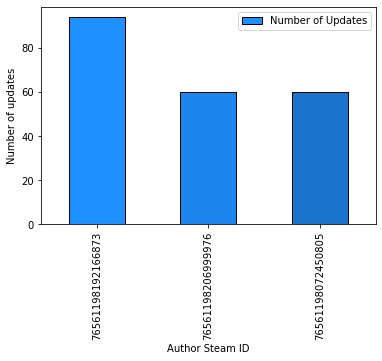

In [134]:
ax = top3_authors.plot.bar(x='Author_id', y='Number of Updates', color =['#1E90FF', '#1C86EE', '#1874CD'], edgecolor ='black')


ax.set_xlabel("Author Steam ID")
ax.set_ylabel("Number of updates")

plt.show()

# RQ7 - Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.



## What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?


In [135]:
# dataframe of weighted vote scores equal or bigger than 0.5
weight_df = dataframe[dataframe['weighted_vote_score']>=0.5]


In [136]:
# number of weighted scores that are equal or bigger than 0.5
weight_num = weight_df.weighted_vote_score.shape[0]

In [137]:
# total number of weighted vote scores
total_weight_num = dataframe.weighted_vote_score.shape[0]

In [138]:
# probability calculation of weighted vote score is equal to or bigger than 0.5
prob_weight = (weight_num / total_weight_num)*100

In [139]:
print('{:.2f}% is the probability that a review has a Weighted Vote Score equal to or bigger than 0.5'.format(prob_weight))

21.76% is the probability that a review has a Weighted Vote Score equal to or bigger than 0.5


## What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?


In [140]:
# dataframe of weighted vote scores bigger than 0.5
weighted_second_df = dataframe[dataframe['weighted_vote_score']>0.5]


In [141]:
# dataframe of funny vote scores given that weighted scores bigger than 0.5
funny_weight_df = weighted_second_df[weighted_second_df['votes_funny']>0]


In [142]:
# number of funny vote scores given that the weighted score is bigger than 0.5
funny_weight_num = funny_weight_df.votes_funny.shape[0]

In [143]:
# number of total weighted vote scores of > 0.5
total_weight_num = weighted_second_df.weighted_vote_score.shape[0]

In [144]:
# probability calculation of there is at least one funny vote given that the weighted vote score is bigger than 0.5
prob_funny_weight_list = (funny_weight_num / total_weight_num)*100

In [145]:
print('{:.2f}% is the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5'
      .format(prob_funny_weight_list))


19.08% is the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5


## Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?


 To check that the events $RF=$“a review has at least one vote as funny” and $WS=$“a review has a Weighted Vote Score equal or bigger than 0.5” are independent we have to check if the following equality holds:
\begin{equation}
\mathbf P (RF \cap WS) = \mathbf P (RF) \mathbf P (WS)
\end{equation}

In [146]:
# dataframe of funny vote scores that has at least 1 votes
funny_df = dataframe[dataframe['votes_funny']>0]

In [147]:
# number of reviews that has at least 1 funny voting
funny_one_num = funny_df.votes_funny.shape[0]

In [148]:
# total number of reviews of the funny votes
total_funny_num = dataframe.votes_funny.shape[0]

In [149]:
# probability calculation of there is at least one funny vote
prob_funny = (funny_one_num / total_funny_num)*100

In [160]:
print('The probability of a review has at least one vote as funny is {:.2f}%'.format(prob_funny))

The probability of a review has at least one vote as funny is 11.69%


In [152]:
# dataframe that there is at least one funny vote score
# given that the weighted vote scores equal or bigger than 0.5
funny_and_weight_df = weight_df[weight_df['votes_funny']>0]


In [153]:
# number of at least 1 funny votes given that the weighted score is equal or bigger than 0.5
funny_and_weight_num = funny_and_weight_df.votes_funny.shape[0]

In [154]:
# total number of funny votes given that the weighted score is equal or bigger than 0.5
total_funny_and_weight_num = dataframe.weighted_vote_score.shape[0]

In [155]:
# probability calculation of there is at least one funny vote given that the vote score is equal or bigger than 0.5
prob_funny_and_weight = (funny_and_weight_num / total_funny_and_weight_num)*100

In [159]:
print('The probability of a review has at least one vote as funny probability of a review has at least one vote as funny and has a weighted vote score equal or bigger than 0.5 is {:.2f}%'.format(prob_funny_and_weight))

The probability of a review has at least one vote as funny probability of a review has at least one vote as funny and has a weighted vote score equal or bigger than 0.5 is 4.14%


In [157]:
# probability calculation of P(A).P(B)
prob_multiplication = ((prob_weight/100)*(prob_funny/100))*100

In [158]:
if(np.isclose(prob_multiplication, prob_funny_and_weight)):
    print('These events are INDEPENDENT')
else:
    print('These events are NOT INDEPENDENT')

These events are NOT INDEPENDENT


# RQ8 - Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

## Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.


In [6]:
#extracting russian weighted vote score
russian_weighted_score_df = dataframe[dataframe['language'] == 'russian']
russian_weighted_score = np.array(dataframe['weighted_vote_score'])

In [7]:
#extracting chinese weighted vote scores from both schinese and tchinese
schinese_weighted_score_df = dataframe[dataframe['language'] == 'schinese']
tchinese_weighted_score_df = dataframe[dataframe['language'] == 'tchinese']

In [8]:
chinese_dataframes = [schinese_weighted_score_df, tchinese_weighted_score_df]
chinese_weighted_scores_df = pd.concat(chinese_dataframes)

In [9]:
chinese_weighted_score = np.array(chinese_weighted_scores_df['weighted_vote_score'])

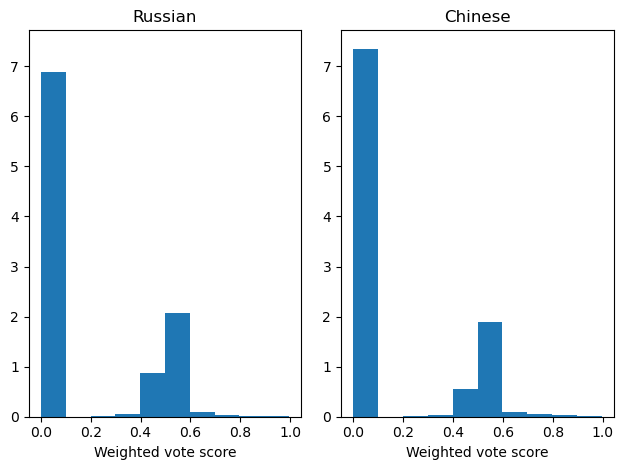

In [10]:
plt.rcdefaults()   #resets to default the rcParams value
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

#density = True is used to plot a porbability distribution-like normalized histogram
axs[0].hist(russian_weighted_score, density = True)
axs[0].set_xlabel('Weighted vote score')
axs[0].set_title('Russian')
axs[1].hist(chinese_weighted_score, density = True)
axs[1].set_xlabel('Weighted vote score')
axs[1].yaxis.set_tick_params(labelbottom=True)
axs[1].set_title('Chinese')

plt.show()

We can see that the shape of the two histograms above that look similar. The high number of zero scores is probably caused by the way in which this score is defined, and, even though we miss this information, we believe that to properly analyze the similarity between the two distributions we should remove the zero values.

In [11]:
# extracting the non zero values from the two distributions
nonzero_russian_weighted_score = russian_weighted_score[russian_weighted_score>0]
nonzero_chinese_weighted_score = chinese_weighted_score[chinese_weighted_score>0]

In [12]:
# here we compute the two histograms

# we fix the range of the histogram to be between
# the smallest and the biggest value of both the arrays
russian_min = nonzero_russian_weighted_score.min()
chinese_min = nonzero_chinese_weighted_score.min()
russian_max = nonzero_russian_weighted_score.max()
chinese_max = nonzero_chinese_weighted_score.max()
histogram_range = (min(russian_min, chinese_min), max(russian_max, chinese_max))

# we choose the number of bins as the maximum value that
# keeps every bin filled with at least 10 counts
nbins = 10
minimum_count = 10
while minimum_count>=10:
    nbins += 1
    russian_counts = np.histogram(nonzero_russian_weighted_score, bins = nbins, range = histogram_range)[0]
    chinese_counts = np.histogram(nonzero_chinese_weighted_score, bins = nbins, range = histogram_range)[0]
    minimum_count = min(russian_counts.min(), chinese_counts.min())
nbins -= 1

In [13]:
normalized_russian_freq, bins_list = np.histogram(nonzero_russian_weighted_score, bins = nbins, range = histogram_range, density = True)
normalized_chinese_freq, bins_list = np.histogram(nonzero_chinese_weighted_score, bins = nbins, range = histogram_range, density = True)

In [14]:
bin_width = bins_list[1]-bins_list[0]
print('Number of bins: {}\nBins width: {:.5f}'.format(nbins, bin_width))

Number of bins: 26
Bins width: 0.03799


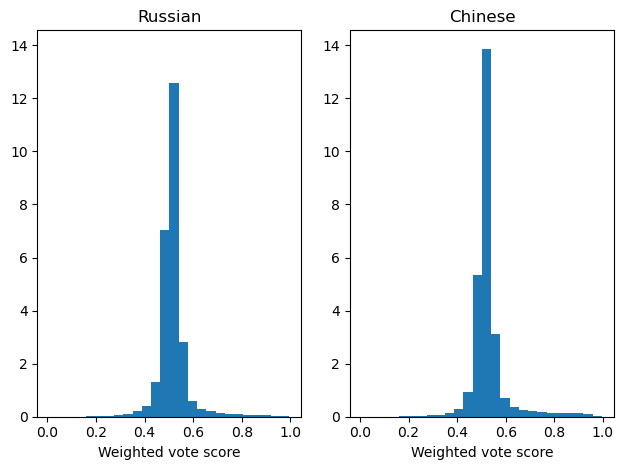

In [15]:
#here we plot the two normalized histograms

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].bar(bins_list[:-1], normalized_russian_freq, width = bin_width, align="edge")
axs[0].set_xlabel('Weighted vote score')
axs[0].set_title('Russian')

axs[1].bar(bins_list[:-1], normalized_chinese_freq, width = bin_width, align="edge")
axs[1].set_xlabel('Weighted vote score')
axs[1].yaxis.set_tick_params(labelbottom=True)
axs[1].set_title('Chinese')

plt.show()

We will run a t-test to compare the mean of the two sets of data, and then a $\chi^2$ test on the above histograms to decide wether they have the same shape or not. To be able to run these two tests we have to verify this two hypoteses:
* There must be no outliers: anomalous data could make the analysis misleading, so we are gonna check if there are no scores outside the range [0,1]
* The quantitative variable must be distributed approximately as a normal in both groups

In [16]:
# checking the boundary of our data
print('The minimum and maximum possible weighted vote scores are %.2f and %.2f' % (dataframe['weighted_vote_score'].min(), dataframe['weighted_vote_score'].max()))


The minimum and maximum possible weighted vote scores are 0.00 and 1.00


In [17]:
# Verifying the approximative normal distribution
from scipy.stats import normaltest
chinese_statistic, chinese_p  = normaltest(nonzero_chinese_weighted_score)
russian_statistic, russian_p  = normaltest(nonzero_russian_weighted_score)
print('The p values for the hypoteses that the russian and chinese weighted vote scores are normally distributed are %g and %g respectively.' % (russian_p,chinese_p))


The p values for the hypoteses that the russian and chinese weighted vote scores are normally distributed are 0 and 0 respectively.


Having verified above hypoteses, we now proceed to do the tests.

Given two histogram with $n$ bins, let's call $r_i$ the value in the $i^{th}$ bin of the first histogram and $c_i$ the value in the $i^{th}$ bin of the second one. We define:

\begin{equation}
R = \sum_{i=1}^n r_i
\end{equation}
\begin{equation}
C = \sum_{i=1}^n c_i
\end{equation}
\begin{equation}
T = \frac{1}{RC}\sum_{i=1}^n \frac{(Rc_i-Cm_i)^2}{r_i+c_i}
\end{equation}

Then the random variable $T$ should be distributed like a $\chi^2_{(n-1)}$, and we will calculate the probability of obtaining our result (or worse) under the hypotesis that the two histograms have the same shape, i.e. we will calculate $P(\chi^2_{(n-1)}>=T)$.

Given two normally distributed but independent populations, we denote with $x_1,\ x_2$ and $s_\,\ s_2$ respectively the mean and the estimated standard deviations of the two populations. Then we define:
\begin{equation}
t = -\frac{\lvert x_1-x_2\rvert}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}
\end{equation}
where $n_1,\ n_2$ denote the respective size of the two populations. Then, if we define $n = min(n_1-1,n_2-2)$, the $t$ value we found is distributed as a Student t distribution and we will calculate the probability of obtaining our result (or worse) given the hypotesis that the two means are equal.

In [18]:
from scipy.stats import chi2

C = np.sum(normalized_chinese_freq)
R = np.sum(normalized_russian_freq)
T = np.sum((C*normalized_russian_freq-R*normalized_chinese_freq)**2/(normalized_chinese_freq+normalized_russian_freq))/(R*C)

chisq_p_value = 1 - chi2.cdf(T, nbins-1)

In [19]:
russian_mean = nonzero_russian_weighted_score.mean()
russian_std = nonzero_russian_weighted_score.std()
russian_n = nonzero_russian_weighted_score.shape[0]
chinese_mean = nonzero_chinese_weighted_score.mean()
chinese_std = nonzero_chinese_weighted_score.std()
chinese_n = nonzero_chinese_weighted_score.shape[0]

n = min(chinese_n-1, russian_n - 1)

In [20]:
from scipy.stats import t
import math
t_value = -abs(russian_mean - chinese_mean)/math.sqrt(chinese_std**2/chinese_n+russian_std**2/russian_n)

student_p_value = 2*t.cdf(t_value, n)

In [21]:
print('Fixed the number of bins, the probability of obtaining our results (or worse) under the hypotesis that the two histograms have the same shape is %g' % chisq_p_value)
print('Assuming that the data have the same expected value, the probability of obtaining our result for the t value (or worse) is %g' % student_p_value)


Fixed the number of bins, the probability of obtaining our results (or worse) under the hypotesis that the two histograms have the same shape is 1
Assuming that the data have the same expected value, the probability of obtaining our result for the t value (or worse) is 0


The $P$-value in the $\chi^2$ test turned out to be $1$, while the $P$-value in the t-test turned out to be $0$.

The t-test result tells us that there is indeed a significative difference between the two datasets, while the $\chi^2$ test seems to tell us that the two samples have the same distribution; why do we obtain such contradictory results? Let's dig a bit more into the data to understand it.

In [22]:
print('The average weighted vote score of the reviews written in chinese is %.3f with a standard deviation of %.3f' % (chinese_mean, chinese_std))
print('The average weighted vote score of the reviews written in russian is %.3f with a standard deviation of %.3f' % (russian_mean, russian_std))


The average weighted vote score of the reviews written in chinese is 0.528 with a standard deviation of 0.076
The average weighted vote score of the reviews written in russian is 0.516 with a standard deviation of 0.063


Now we can see the issue with more clarity; the bin width is about 0.05, while the (significant) difference between the two means is about 0.01: with this binning we can't see any difference between the two means, we need at least a resolution of 0.005 in the histogram to be able to appreciate this difference. We won't repeat the $\chi^2$ test with this much resolution because the data is concentrated in small portion of the $[0,1]$ interval so we would end up with histograms that have a lot of empty bins, and the test would lose its significance; we will instead draw our conclusion from the results we obtained.

The t-test shows that there is indeed a difference in the weighted vote score of the reviews written in chinese and those written in russian, this difference however, although statistically significant, is very small and cannot be observed at the scale of our histograms, which instead look, as confirmed by the $\chi^2$ test, very similar, meaning that there is a certain degree of similarity between the distribution of the two samples. In conclusion, the distribution of the weighted vote score of the reviews written in chinese and in russian are very similar on a wide scale, but there is a statistically significative difference between the two that needs to be taken into account once we move to a smaller scale.

Now we also want to use the information about the null weighted scores that we removed earlier as we think that it can give additional information about the difference between russian and chinese reviewers: we will consider a two outcomes random variable which follows the binomial distribution where a success is defined as the event {a given review as a weighted vote score equal to zero}, and we will use this random variable to model the number of null weighted scores in the russian and the chinese reviewers.

In [23]:
#here we compute the relative frequency of a zero score for the two languages
russian_zero_weighted_score = (russian_weighted_score.shape[0] - nonzero_russian_weighted_score.shape[0])/russian_weighted_score.shape[0]
chinese_zero_weighted_score = (chinese_weighted_score.shape[0] - nonzero_chinese_weighted_score.shape[0])/chinese_weighted_score.shape[0]


In [24]:
print('The relative frequency of a zero score for the russian reviewers is %.2f' % russian_zero_weighted_score)
print('The relative frequency of a zero score for the chinese reviewers is %.2f' % chinese_zero_weighted_score)

The relative frequency of a zero score for the russian reviewers is 0.69
The relative frequency of a zero score for the chinese reviewers is 0.73


Under the assumptions above, we obtained a $0.59$ probability that a russian review has a zero weighted score, and a $0.73$ probability that a chinese review has a zero weighted score. The difference between the two results seems to be significant. 

Further analysis and interpretation would require a deeper knowledge about the way in which the weighted score value is actually computed. Despite this fact, we believe that our results can say something about the population of the review:
1. the distribution of the weighted scores (excluding the zero case) seems to be independent of the actual language in which the review is written (at least for the russian and chinese languages)
2. the quantity of null weighted scores does depend on the language in which the review is written and probably reflects a property about the underlying population of reviewers

## Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.


In [25]:
# computing the time that a user lets pass before updating the review
dataframe['elapsed'] = dataframe['timestamp_updated'] - dataframe['timestamp_created']

Below we plot the time passed before updating a review versus the weighted vote score of the review.

In [26]:
seconds_in_a_year = 365*24*60*60

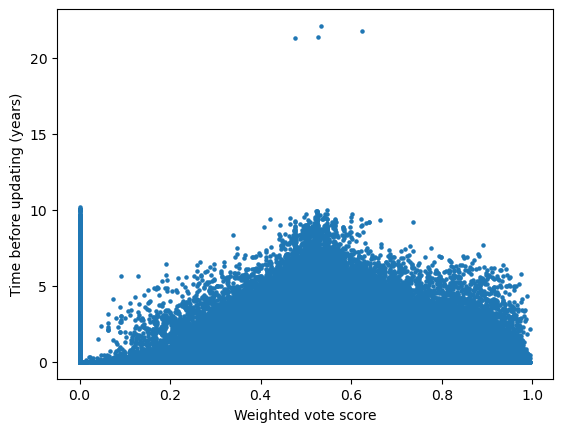

In [27]:
import matplotlib as mpl
plt.rcdefaults()   # resets to default the rcParams
mpl.rcParams['agg.path.chunksize'] = 10000   # needed because the points to plot are too much

fig, axs = plt.subplots()

axs.scatter(dataframe['weighted_vote_score'], dataframe['elapsed'] / seconds_in_a_year, s = 5)
axs.set_xlabel('Weighted vote score')
axs.set_ylabel('Time before updating (years)')
plt.show()
plt.rcdefaults()   # resets to default the rcParams value edited above

The spike near the left of the plot corresponds to the fact that a large amount of reviews have a null weighted vote score (as we have seen in the previous analysis).

Looking at the plot we can't see a clear relation between the two variables, let's try running a Pearson correlation test to confirm this observation. We will remove the review with a null weighted vote score as they could influence negatively the analysis. We will also remove the four outliers for better visualization (with so much values it doesn't matter whether we actually remove them from the dataset or we keep them in the analysis).

Motivated by the analysis in the previous point, we will analyze separately the case of never updated reviews.

In [28]:
updated_reviews = dataframe[dataframe['weighted_vote_score']>0]

In [29]:
# there are lot of review that seems to updated after 1 sec, so to eliminate that we put more than 1
updated_reviews = updated_reviews[updated_reviews['elapsed'] > 0]

# there are couple of reviews that has been updated after 20+ year. We can disregarded that data for now.
updated_reviews = updated_reviews[updated_reviews['elapsed'] <5e8]

In [30]:
updated_reviews

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,elapsed
3,1015500,WWE 2K20,55718724,russian,1571761343,1.574792e+09,True,7,0,0.453878,...,False,False,76561198028236493,258,39,7719.0,153.0,194.0,1.610145e+09,3.031016e+06
12,1015500,WWE 2K20,55719010,koreana,1128743216,1.132361e+09,False,0,0,0.527390,...,False,False,76561197875088875,16,2,139.0,0.0,139.0,1.116720e+09,3.617699e+06
13,1015500,WWE 2K20,55719010,koreana,1571762445,1.571762e+09,False,9,1,0.527390,...,False,False,76561198022477611,19,1,139.0,0.0,139.0,1.571760e+09,4.800000e+01
18,1015500,WWE 2K20,55719577,english,1571765005,1.571765e+09,False,3,0,0.502075,...,False,False,76561198078232491,65,2,2086.0,0.0,392.0,1.605096e+09,3.100000e+01
20,1015500,WWE 2K20,55719585,english,1012298594,1.020357e+09,False,0,0,0.537800,...,False,False,76561197923022314,162,1,6844.0,423.0,534.0,1.012055e+09,8.058003e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38612208,960090,Bloons TD 6,85178632,english,1469466019,1.473505e+09,True,0,0,0.523810,...,False,False,76561197930562572,1121,1,3436.0,1996.0,3412.0,1.450940e+09,4.039094e+06
38612246,960090,Bloons TD 6,85182258,english,1397576364,1.409978e+09,False,0,1,0.474138,...,False,False,76561197871376810,3,9,316.0,316.0,316.0,1.380879e+09,1.240168e+07
38612262,960090,Bloons TD 6,85183984,english,1082773438,1.096820e+09,True,0,289,0.523810,...,False,False,76561197889338741,6,1,8322.0,0.0,8322.0,1.074610e+09,1.404652e+07
38612286,960090,Bloons TD 6,85187529,english,1017768082,1.023616e+09,True,0,0,0.545455,...,False,False,76561197942817530,52,3,107.0,0.0,107.0,1.006195e+09,5.848262e+06


In [31]:
from scipy.stats import pearsonr

r, p = pearsonr(updated_reviews['weighted_vote_score'], updated_reviews['elapsed'])

In [32]:
# we calculated the linear correlation coefficient both implicitly and explicitly to double check the results
covariance = np.cov(updated_reviews['weighted_vote_score'], updated_reviews['elapsed'])[0][1]
stdev_weighted_vote_score = np.std(updated_reviews['weighted_vote_score'])
stdev_time_before_update = np.std(updated_reviews['elapsed'])

linear_correlation_coefficient = covariance/(stdev_weighted_vote_score*stdev_time_before_update)

In [33]:
print('Built-in coefficient is',r)
print('Our coefficient is', linear_correlation_coefficient)

Built-in coefficient is -0.006804158495824024
Our coefficient is -0.006804161484805592


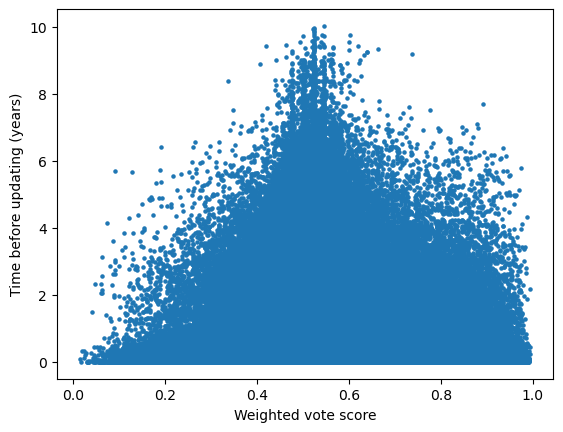

In [34]:
fig, axs = plt.subplots()

axs.scatter(updated_reviews['weighted_vote_score'], updated_reviews['elapsed'] / seconds_in_a_year, s = 5)
axs.set_xlabel('Weighted vote score')
axs.set_ylabel('Time before updating (years)')
plt.show()

In [35]:
print('The Pearson correlation coefficient is %.3f' % r)

The Pearson correlation coefficient is -0.007


The r coefficient is pretty low, implying that a linear correlation is unlikely.

Despite this last fact, the plot above indicates some possible correlation between the weighted score and the average time elapsed before updating, so we proceed with the analysis.

In [36]:
# we will divide the weighted vote score in bins and compute
# the mean of the elapsed time before updating inside each bin
nbin = 30

bins_list = np.linspace(0,1, nbin+1) #len(bins_list) = nbin+1

mean_elapsed_time = np.zeros(nbin)
bin_center = bins_list[:-1] + bins_list[1]/2

for i in range(nbin):
    temp = updated_reviews[updated_reviews['weighted_vote_score'] > bins_list[i]]
    temp = temp[temp['weighted_vote_score'] <= bins_list[i+1]]
    if temp.shape[0]>0:
        mean_elapsed_time[i] = temp['elapsed'].mean()

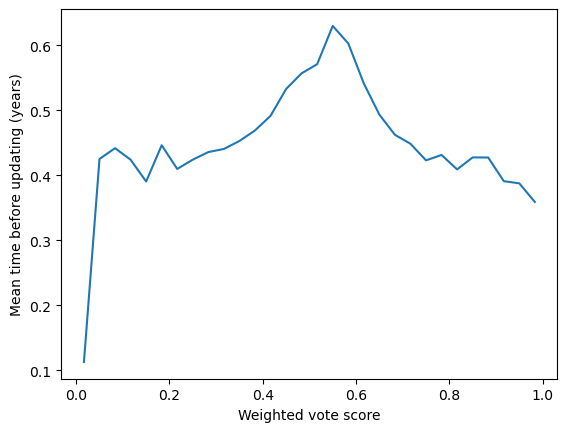

In [37]:
fig, axs = plt.subplots()

axs.plot(bin_center, mean_elapsed_time / seconds_in_a_year)
axs.set_xlabel('Weighted vote score')
axs.set_ylabel('Mean time before updating (years)')
plt.show()

Now we can see a correlation, although of non linear nature: the review with score near $0.5$ seem to be all updated later. We won't run further tests as we think it would not add much to the analysis.

Now we will take a look at the review that have never been updated.

In [38]:
never_updated_reviews = dataframe[dataframe['weighted_vote_score']>0]
never_updated_reviews = never_updated_reviews[never_updated_reviews['elapsed'] == 0]

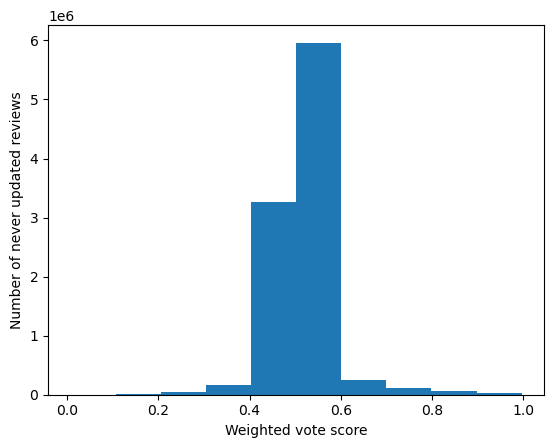

In [39]:
fig, axs = plt.subplots()

axs.hist(never_updated_reviews['weighted_vote_score'])
axs.set_xlabel('Weighted vote score')
axs.set_ylabel('Number of never updated reviews')
plt.show()

This bell-shaped histogram is what we expected, as it resembles the distribution of the weighted vote score themselves, we will perform a further renormalization.

In [40]:
weighted_vote_scores = dataframe['weighted_vote_score']
total_freq, bins_list = np.histogram(weighted_vote_scores[weighted_vote_scores>0], range = (0,1))
data_freq, bins_list = np.histogram(never_updated_reviews['weighted_vote_score'], range = (0,1))

In [41]:
normalized_freq = data_freq/total_freq

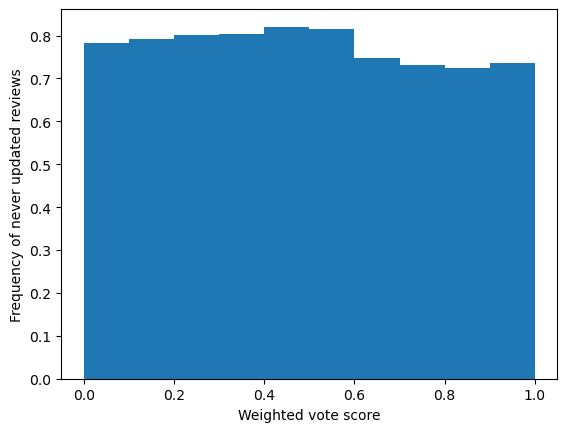

In [42]:
fig, axs = plt.subplots()

bin_width = bins_list[1]-bins_list[0]
axs.bar(bins_list[:-1], normalized_freq, width = bin_width, align="edge")
axs.set_xlabel('Weighted vote score')
axs.set_ylabel('Frequency of never updated reviews')

plt.show()

The last histogram finally shows that the reviews that never get updated are uniformly distributed among the various weighted vote scores, i.e. there is not a significant relationship between the probability that a review never gets updated and its weighted vote score.

Here we will repeat the analysis of the previous point in the two possible cases of recommendations.## Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.


Here we will repeat the analysis of the previous point in the two possible cases of recommendations.

In [44]:
recommended = dataframe[dataframe['recommended'] == True]
not_recommended = dataframe[dataframe['recommended'] == False]

In [45]:
print('Number of recommended reviews:',recommended.shape[0])
print('Number of unrecommended reviews:',not_recommended.shape[0])

Number of recommended reviews: 33738552
Number of unrecommended reviews: 4873892


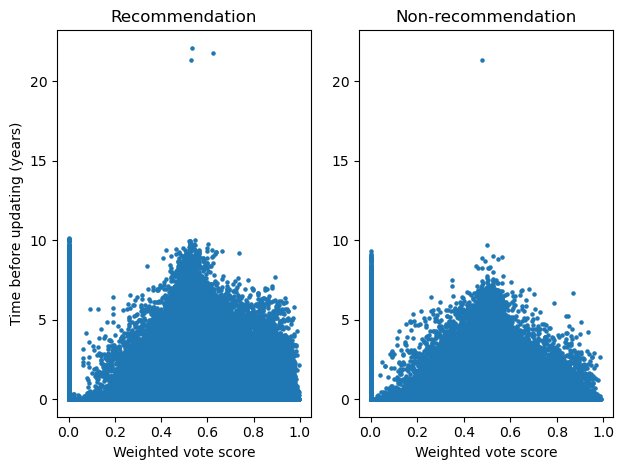

In [46]:
mpl.rcParams['agg.path.chunksize'] = 10000   #needed because the points to plot are too much

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].scatter(recommended['weighted_vote_score'], recommended['elapsed'] / seconds_in_a_year, s = 5)
axs[0].set_xlabel('Weighted vote score')
axs[0].set_ylabel('Time before updating (years)')
axs[0].set_title('Recommendation')

axs[1].scatter(not_recommended['weighted_vote_score'], not_recommended['elapsed'] / seconds_in_a_year, s = 5)
axs[1].set_xlabel('Weighted vote score')
axs[1].yaxis.set_tick_params(labelbottom=True)
axs[1].set_title('Non-recommendation')

plt.show()
plt.rcdefaults()   #resets to default the rcParams value edited above

The situation is very similar to the previous point: looking at the plot we can't see a clear relation between the two variables; we will try running a Pearson correlation test to confirm this observation. We will also remove the review with a null weighted vote score and the four outliers just as before.

In [47]:
recommended_updated_reviews = recommended[recommended['weighted_vote_score']>0]
not_recommended_updated_reviews = not_recommended[not_recommended['weighted_vote_score']>0]

In [48]:
recommended_updated_reviews = recommended_updated_reviews[recommended_updated_reviews['elapsed'] > 0]
recommended_updated_reviews = recommended_updated_reviews[recommended_updated_reviews['elapsed'] <5e8]
not_recommended_updated_reviews = not_recommended_updated_reviews[not_recommended_updated_reviews['elapsed'] > 0]
not_recommended_updated_reviews = not_recommended_updated_reviews[not_recommended_updated_reviews['elapsed'] <5e8]

In [49]:
recommended_r, recommended_p = pearsonr(recommended_updated_reviews['weighted_vote_score'], recommended_updated_reviews['elapsed'])
not_recommended_r, not_recommended_p = pearsonr(not_recommended_updated_reviews['weighted_vote_score'], not_recommended_updated_reviews['elapsed'])


In [50]:
# we calculated the linear correlation coefficients both implicitly and explicitly to double check the results
recommended_covariance = np.cov(recommended_updated_reviews['weighted_vote_score'], recommended_updated_reviews['elapsed'])[0][1]
recommended_stdev_weighted_vote_score = np.std(recommended_updated_reviews['weighted_vote_score'])
recommended_stdev_time_before_update = np.std(recommended_updated_reviews['elapsed'])

recommended_linear_correlation_coefficient = recommended_covariance / (recommended_stdev_weighted_vote_score * recommended_stdev_time_before_update)

not_recommended_covariance = np.cov(not_recommended_updated_reviews['weighted_vote_score'], not_recommended_updated_reviews['elapsed'])[0][1]
not_recommended_stdev_weighted_vote_score = np.std(not_recommended_updated_reviews['weighted_vote_score'])
not_recommended_stdev_time_before_update = np.std(not_recommended_updated_reviews['elapsed'])

not_recommended_linear_correlation_coefficient = not_recommended_covariance / (not_recommended_stdev_weighted_vote_score * not_recommended_stdev_time_before_update)


In [51]:
print('Built-in coefficient for recommended reviews is', recommended_r)
print('Our coefficient for recommended reviews is', recommended_linear_correlation_coefficient)
print('Built-in coefficient for not recommended reviews is', not_recommended_r)
print('Our coefficient for not recommended reviews is', not_recommended_linear_correlation_coefficient)

Built-in coefficient for recommended reviews is -0.034427108657547965
Our coefficient for recommended reviews is -0.03442712855964982
Built-in coefficient for not recommended reviews is 0.04100896016136838
Our coefficient for not recommended reviews is 0.04100903518387942


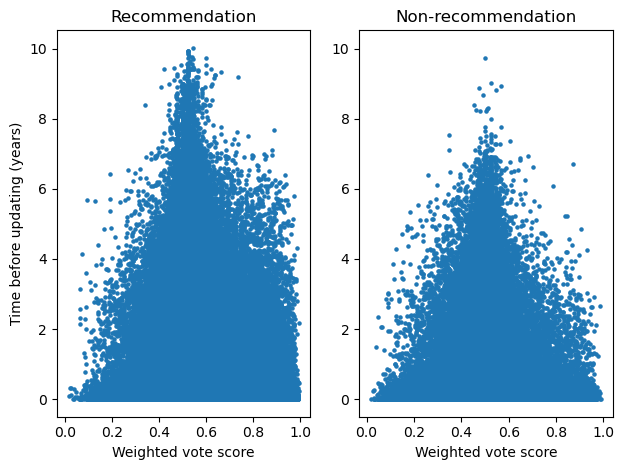

In [52]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].scatter(recommended_updated_reviews['weighted_vote_score'], recommended_updated_reviews['elapsed'] / seconds_in_a_year, s = 5)
axs[0].set_xlabel('Weighted vote score')
axs[0].set_ylabel('Time before updating (years)')
axs[0].set_title('Recommendation')

axs[1].scatter(not_recommended_updated_reviews['weighted_vote_score'], not_recommended_updated_reviews['elapsed'] / seconds_in_a_year, s = 5)
axs[1].set_xlabel('Weighted vote score')
axs[1].yaxis.set_tick_params(labelbottom=True)
axs[1].set_title('Non-recommendation')
plt.show()

In [53]:
print('The Pearson correlation coefficient for the recommendation case is %.3f' % recommended_r)
print('The Pearson correlation coefficient for the non-recommendation case is %.3f' % not_recommended_r)

The Pearson correlation coefficient for the recommendation case is -0.034
The Pearson correlation coefficient for the non-recommendation case is 0.041


The r coefficients are both pretty low, implying that a linear correlation is unlikely.

Just as before, we will proceed in analysing the the average time elapsed before updating.

In [54]:
# we will divide the weighted vote score in bins and compute
# the mean of the elapsed time before updating inside each bin
# and the number of total reviews for each bin
nbin = 30

bins_list = np.linspace(0,1, nbin+1) #len(bins_list) = nbin+1
bin_center = bins_list[:-1] + bins_list[1]/2
bin_width = bins_list[1]-bins_list[0]


recommended_mean_elapsed_time = np.zeros(nbin)
recommended_review_counts = np.zeros(nbin)
not_recommended_mean_elapsed_time = np.zeros(nbin)
not_recommended_review_counts = np.zeros(nbin)

for i in range(nbin):
    temp = recommended_updated_reviews[recommended_updated_reviews['weighted_vote_score'] > bins_list[i]]
    temp = temp[temp['weighted_vote_score'] <= bins_list[i+1]]
    recommended_review_counts[i] = temp.shape[0]
    if temp.shape[0]>0:
        recommended_mean_elapsed_time[i] = temp['elapsed'].mean()
        

for i in range(nbin):
    temp = not_recommended_updated_reviews[not_recommended_updated_reviews['weighted_vote_score'] > bins_list[i]]
    temp = temp[temp['weighted_vote_score'] <= bins_list[i+1]]
    not_recommended_review_counts[i] = temp.shape[0]
    if temp.shape[0]>0:
        not_recommended_mean_elapsed_time[i] = temp['elapsed'].mean()

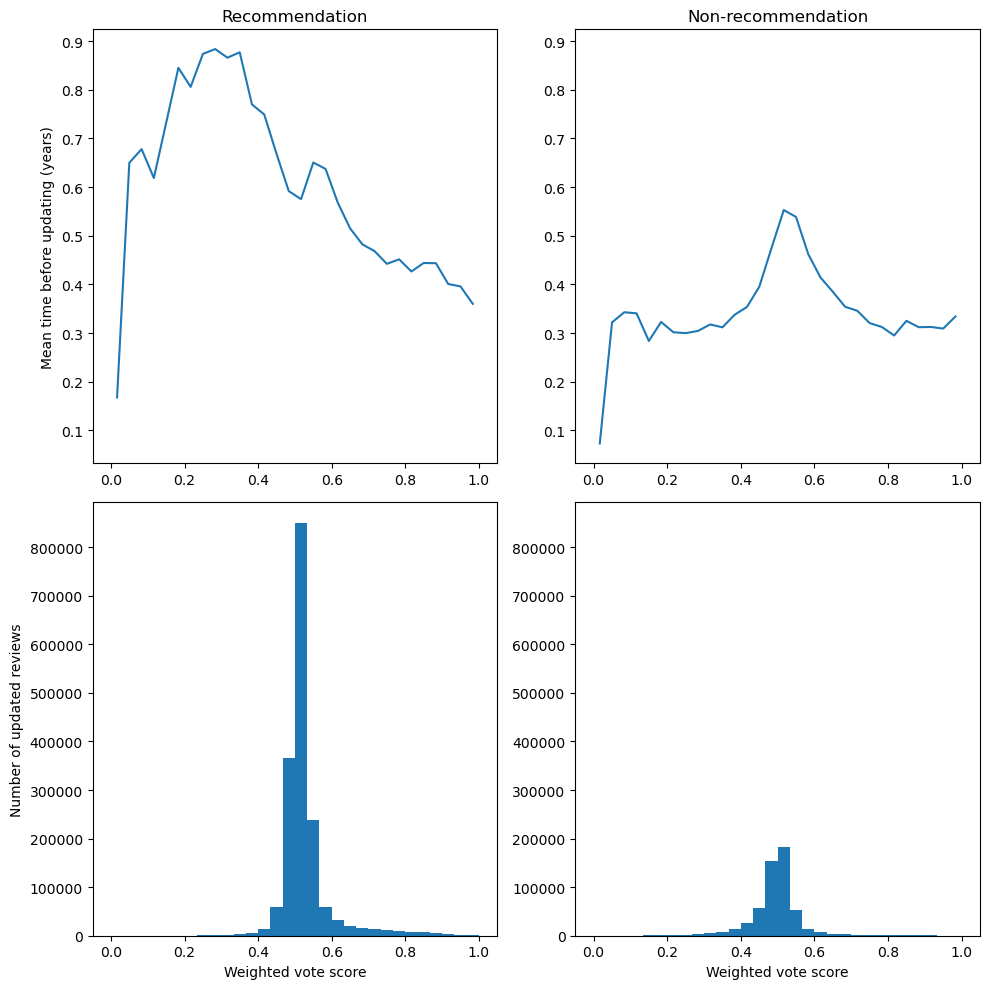

In [55]:
fig, axs = plt.subplots(2, 2, tight_layout=True, sharex='col', sharey='row', figsize=(10,10))

axs[0][0].plot(bin_center, recommended_mean_elapsed_time / seconds_in_a_year)
axs[0][0].xaxis.set_tick_params(labelbottom=True)
axs[0][0].set_ylabel('Mean time before updating (years)')
axs[0][0].set_title('Recommendation')

axs[0][1].plot(bin_center, not_recommended_mean_elapsed_time / seconds_in_a_year)
axs[0][1].yaxis.set_tick_params(labelbottom=True)
axs[0][1].xaxis.set_tick_params(labelbottom=True)
axs[0][1].set_title('Non-recommendation')

axs[1][0].bar(bins_list[:-1], recommended_review_counts, width = bin_width, align="edge")
axs[1][0].set_xlabel('Weighted vote score')
axs[1][0].set_ylabel('Number of updated reviews')

axs[1][1].bar(bins_list[:-1], not_recommended_review_counts, width = bin_width, align="edge")
axs[1][1].set_xlabel('Weighted vote score')
axs[1][1].yaxis.set_tick_params(labelbottom=True)

plt.show()

In the figure above we plotted both the mean time before the update and the number of actual reviews.
The difference is now clearer: when a review does not recommend the game, the mean time of update peeks around $0.5$ weighted score, like in the general case. When a review does recommend the game though, the peek is shifted towards a score of $0.2-0.3$ and, more importantly, the mean time before the update is generally higher: it seems that the people are slower in updating the review when they liked the game. From the histograms we can also understand how much the two types of review contribute to the general case.

Now we will take a look at the review that have never been updated.

In [56]:
recommended_never_updated_reviews = dataframe[dataframe['recommended'] == True]
recommended_never_updated_reviews = recommended_never_updated_reviews[recommended_never_updated_reviews['weighted_vote_score']>0]
recommended_never_updated_reviews = recommended_never_updated_reviews[recommended_never_updated_reviews['elapsed'] == 0]

not_recommended_never_updated_reviews = dataframe[dataframe['recommended'] == False]
not_recommended_never_updated_reviews = not_recommended_never_updated_reviews[not_recommended_never_updated_reviews['weighted_vote_score']>0]
not_recommended_never_updated_reviews = not_recommended_never_updated_reviews[not_recommended_never_updated_reviews['elapsed'] == 0]

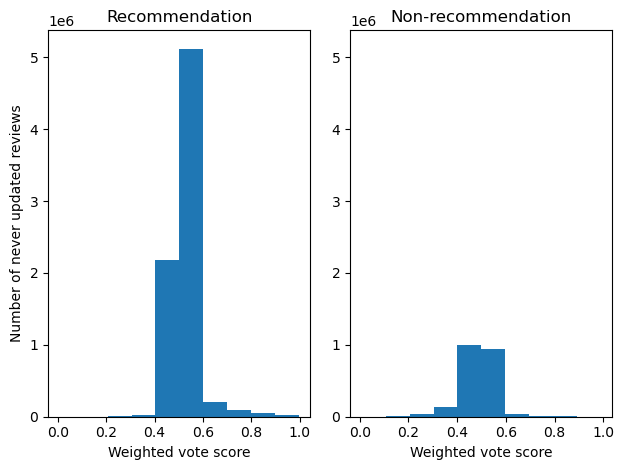

In [57]:
fig, axs = plt.subplots(1, 2, tight_layout=True, sharey= True)

axs[0].hist(recommended_never_updated_reviews['weighted_vote_score'])
axs[0].set_xlabel('Weighted vote score')
axs[0].set_ylabel('Number of never updated reviews')
axs[0].set_title('Recommendation')

axs[1].hist(not_recommended_never_updated_reviews['weighted_vote_score'])
axs[1].set_xlabel('Weighted vote score')
axs[1].yaxis.set_tick_params(labelbottom=True)
axs[1].set_title('Non-recommendation')

plt.show()

The situation is similar to the general case: these bell-shaped histogram resemble the distribution of the weighted vote score themselves. We will again perform a further renormalization by dividing every bin by the total number of recommended (or not) review that would fall in that bin.

In [58]:
recommended_weighted_vote_scores = dataframe[dataframe['recommended'] == True]
recommended_weighted_vote_scores = recommended_weighted_vote_scores['weighted_vote_score']
recommended_total_freq, bins_list = np.histogram(recommended_weighted_vote_scores[recommended_weighted_vote_scores>0], range = (0,1))
recommended_data_freq, bins_list = np.histogram(recommended_never_updated_reviews['weighted_vote_score'], range = (0,1))

not_recommended_weighted_vote_scores = dataframe[dataframe['recommended'] == False]
not_recommended_weighted_vote_scores = not_recommended_weighted_vote_scores['weighted_vote_score']
not_recommended_total_freq, bins_list = np.histogram(not_recommended_weighted_vote_scores[not_recommended_weighted_vote_scores>0], range = (0,1))
not_recommended_data_freq, bins_list = np.histogram(not_recommended_never_updated_reviews['weighted_vote_score'], range = (0,1))


In [59]:
recommended_normalized_freq = recommended_data_freq/recommended_total_freq
not_recommended_normalized_freq = not_recommended_data_freq/not_recommended_total_freq

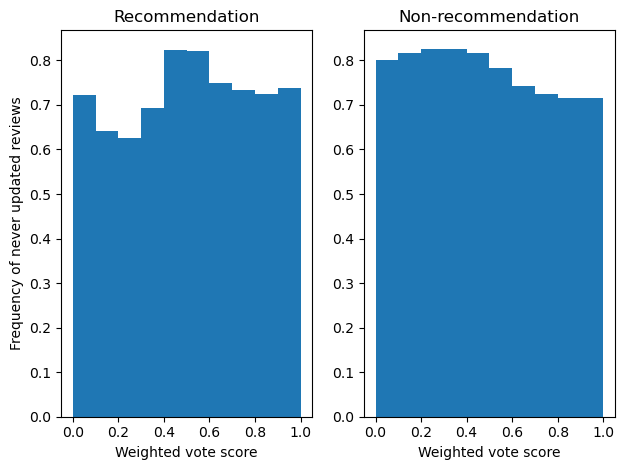

In [60]:
fig, axs = plt.subplots(1, 2, tight_layout=True, sharey= True)

bin_width = bins_list[1]-bins_list[0]

axs[0].bar(bins_list[:-1], recommended_normalized_freq, width = bin_width, align="edge")
axs[0].set_xlabel('Weighted vote score')
axs[0].set_ylabel('Frequency of never updated reviews')
axs[0].set_title('Recommendation')


axs[1].bar(bins_list[:-1], not_recommended_normalized_freq, width = bin_width, align="edge")
axs[1].set_xlabel('Weighted vote score')
axs[1].yaxis.set_tick_params(labelbottom=True)
axs[1].set_title('Non-recommendation')

plt.show()

The last histograms finally shows another difference between the two cases: the reviews that recommend the games actually present more variability in the probability of updating the review given its weighted score.
The non recommendation case seems similar to the general case, but the variability here is more evident: the reviews with high weighted score have a lower probability to be updated.

## What are histograms, bar plots, scatterplots and pie charts used for?


An histogram is a graphic representation used to show the frequency distribution of <ins>continuous quantitative characters </ins>. 
The groups made by the histogram are the "classes": the classes can have different heights and differents widths. The classes are represented by rectangles and the area of the rectangles represents the frequency density .

The Bar Plot is used similarly to the histogram: the height of the bar represents the frequency of the correspondent variable. We use the bar chart to plot <ins> categorical data </ins>. Usually the rectangles in the bar plot are ordered.

The Scatterplot is used to represent <ins>two quantitative variables</ins> on the cartesian space. It's useful to see the correlation  and dependency between two variables (if the scatterplot approximates a line, maybe the two variables are correlated). The scatterplot is also useful to compare the regression line with the data on the graph.

Using Pie Chart can be useful when we have <ins> categorical data </ins>. The chart shows, with its slices, the numerical proportion of every data in the chart.

## What insights can you extract from a Box Plot?


The Box Plot is a graphic representation of five synthesis-numbers:

* Median
* First Quartile
* Third Quartile
* Minimum value
* Maximum value

On the basis of these values, it is possible to have information on the position of the distribution (thanks to the median), on the variability (thanks to the interquartile difference and the range of variation) and on the shape of the distribution.

# Theoretical Questions

## TQ1

<code>
Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)
                </code>


### What does the algorithm compute?

Assuming that A is an array of numbers, the algorithm returns the same output of the one below:

<code>
#we use the convention that the array indexes start from 1

function alg(A,k):
  B = sort(A, ascending_order = True)
  return B[k]
    </code>
    

The algorithm is a randomized and recursive way to find the k<sup>th</sup> element (in ascending order) of a numerical array A.
Infact (with the notation of the algorithm itself):
1. if k<r then L contains more than k elements, and all the elements that are in A and not in L are bigger than every element in L, therefore the k<sup>th</sup> element of L is equal to the k<sup>th</sup> element of A;
2. if k>r then R contains n-r elements and all the elements that are in A and not in R are smaller than every element in R, therefore the k<sup>th</sup> element of A is in R and coincides with the (k-r)<sup>th</sup> element of R (as $k-r+len(A)-len(R) = k$);
3. if k==r then s is the k<sup>th</sup> element of L, and because all the elements of L are smaller than every element in A and not in L, and $len(L)=k$, the k<sup>th</sup> element of L is equal to the k<sup>th</sup> element of A;

The algorithm works under the assumption that there are not repeated elements in A (or else the k<sup>th</sup> element of A is not uniquely defined and the algorithm may actually loop infinitely)

### What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?

There are two possibilities:
1. if k=n then the worst case happens when the random element of A is always chosen to be the minimum of A, in this case every iteration is repeated exactly $n$ times (with 8 operations for every iteration except the last one that has 6) and the complexity is $O(n)$
2. if k<n then the worst case happens when the random element of A is always chosen to be the maximum of A, in this case the algorithm never terminates because it will call itself with always the same arguments

In a slightly better scenario in which we exclude the possibility that s is always chosen to be the maximum of A, we can compute the worst case in this way:
for every step in the recursion imagine to sort A and split it in half, if the k<sup>th</sup> element of A is in the first half choose s to be the element just below the maximum of A, otherwise choose it to be the minimum of A.
In this way the algorithm calls itself $n-1$ times, yielding $O(n)$ complexity.

### What is asymptotically the running time of the algorithm in the best case?

The best case happens when the random element is chosen to be identical to the k<sup>th</sup> element of A, in this case the algorithms terminates in exactly 6 operations, yielding a constant complexity $O(1)$

## TQ2

You are given the recursive function splitSwap, which accepts an array a, an index i, and a length n.

    function splitSwap(a, l, n):
      if n <= 1:
        return
      splitSwap(a, l, n/2)
      splitSwap(a, l+ n /2, n/2)
      swapList(a, l, n)


The subroutine swapList is described here:

    function swapList(a, l, n):
      for i = 0 to n/2:
        tmp = a[l + i]
        a[l + i] = a[l + n/2 + i]
        a[l + n/2 + i] = tmp

### How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)

Let's consider for the moment the case in which $n=2^k$ for some $k$.
The analysis of the swapList function is straightforward: it executes exactly $\frac{3}{2}n$ operations at each call.
For the splitSwap function, if $T(n)$ is the number of operations that the function performs for a given n, it is easy to see that the following holds:

\begin{equation}
T(n)=1+\frac{3}{2}n+2T(\frac{n}{2})
\end{equation}

with the initial condition $T(1)=2$.

Iterating this last formula, we can infer the following (easy to prove):

\begin{equation}
T(n)=\sum_{i=0}^{j-1}2^i+\frac{3}{2}nj+2^jT(\frac{n}{2^j})\ \ \forall j
\end{equation}

which, for $j=k$, gives:

\begin{equation}
T(n)=2^k(3+\frac{3}{2}k)-1=n(3+\frac{3}{2}log_2(n))-1
\end{equation}

from which we see that $O(n)=nlog(n)$.

If we now remove the hypotesis that $n=2^k$, we can show that $T(n)\geq T(2^{\lfloor log_2(n)\rfloor})$ (where $2^{\lfloor log_2(n)\rfloor}$ is the biggest power of $2$ smaller than $n$), and so $O(n)=2^{\lfloor log_2(n)\rfloor}\lfloor log_2(n)\rfloor\sim nlog(n)$.

### What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.

Let's suppose for the moment that $l$, $n$ are such that $l+n\leq len(a)$ and that $n=2^k$ for some $k$.

Let's focus on the function swapList: this function takes a portion of $a$ of size $n$ from index $l$ to index $l+n$, then it splits this portion in half and it swaps these two pieces inside $a$. For example if we execute swapList($a$, $2$, $8$) with $a=[1,2,3,4,5,6,7,8,9,10]$ then we end up with $a=[1,6,7,8,9,2,3,4,5,10]$, that is, we took the subarray $[2,3,4,5,6,7,8,9]$ inside $a$, we splitted it in the two arrays $[2,3,4,5]$ $[6,7,8,9]$, and we swapped them inside $a$.

Now, going back to splitSwap. Let's compute explicitly a couple of cases (assuming that $a$ is big enough):
1. for $n=1$ the function does nothing
2. for $n=2$ the function calls itself with $n=1$ so these subcalls do nothing and we get to swapList, which just swaps the $l^{th}$ and the $(l+1)^{th}$ elements of $a$ (e.g. the first two elements for $l=1$)
3. for $n=4$ the first internal call of splitSwap swaps the $l^{th}$ and the $(l+1)^{th}$ elements of $a$, then the second call, just as the previous point, calls swapList($a$, $l+2$, $2$) which swaps the $(l+2)^{th}$ and the $(l+3)^{th}$ elements; in the end swapList($a$, $l$, $4$) swaps $[a[l],a[l+1]]$ with $[a[l+2],a[l+3]]$. In the end we have that the first four elements of $a$ starting from $a[l]$ are reversed
4. for $n=8$ let's work on an example: $a=[1,2,3,4,5,6,7,8,9,10]$ with $l=1$, the first internal call, according to the previous point, gives $a=[4,3,2,1,5,6,7,8,9,10]$, then with the second call we have $a=[4,3,2,1,8,7,6,5,9,10]$; and in the end swapList gives $a=[8,7,6,5,4,3,2,1,9,10]$, the first $n$ elements get reversed.

At this point it is easy to see what the function does and what are the role of the parameters: it takes a subarray of $n$ elements in $a$, starting at position $l$, and reverses it. The way it does this is by progressively dividing the portion in smaller chunks that gets reversed, and by reversing those smaller chunks themselves.

In case in which $l+n> len(a)$ the behaviour of the algorithm is not well defined (elements outside of the array gets accessed). One could establish the convention that $a[j]=a[j%len(a)]$ whenever $j>len(a)$, this doesn't really add much to the algorithm other than allowing it to extend the interested portion to be reversed beyond the end of $a$ by going back to the start. If one allows this last convention and sets $n$ to actually be bigger than $len(a)$, then the behaviour gets somewhat messy and doesn't seem to resemble any clear structure: for example, if $a=[1,2,3,4,5,6]$, then splitSwap($a$, $5$, $8$) gives $a=[1,2,4,3,6,5]$.

In the end, let's consider the case in which $n$ is not a power of $2$; because $n$ gets halved at every iteration, the algorithm will have to divide by two and odd number. Let's say that this results in a floor division, then the actual behaviour of the algorithm gets more complicated, we will illustrate this in a specific example: set $l=0$, $n=12=3\cdot 2^2$, $a=[1,2,3,4,5,6,7,8,9,10,11,12]$.
The algorithm divides $a$ in four subarrays of three elements each, then $n$ becomes equal to $3$ and the function, instead of reversing the subarrays, performs a floor division and simply swaps the first two elements of each subarray; and in the end the four subarrays gets reordered, yielding $a=[11,10,12,8,7,9,5,4,6,2,1,3]$.
In the general case, lets say that $n=m\cdot 2^k$ with an odd $m$, then, like in the previous example, $a$ is divided in $2^k$ subarrays and these subarrays are moved inside $a$ in a reversing manner, then the last element of each subarray is not considered anymore (because of the floor division), and the result in the rest of the subarray depend on the actual factorization of $m-1$ (which is now even) in terms of an odd number and a power fo $2$.

Having considered these last two complications, we think that the algorithm is actually designed to run in the case of $l+n\leq len(a)$ and $n=2^k$, although it could make sense to consider the case of a generic $n\leq len(a)$ in some specific application.

The algorithm is not always optimal in what it does; let's infact consider the case of reversing an array $a$ such that $len(a)=2^k$, this is done with $O(n)=nlog(n)$ complexity by calling splitSwap($a$, $1$, $2^k$), but we can easily do it in linear time with the following algorithm:

    reverse(a):
        n=len(a)
        for i=0 to n/2:   #here we count from 0 and n/2 is excluded
            temp=a[i]
            a[i]=a[n-i-1]
            a[n-i-1]=temp
            
We could easily adapt this last algorithm in the case of an array of arbitrary length, an arbitrary index %l%, and an $n$ such that $n<len(a)$ and $n=2^k$.

## TQ3

In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values. The following are three natural heuristics:

1. Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded
2. Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded
3. Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if the budget is not exceeded

For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

### Counterexample 1
The problem here is that we could be taking a lot of light objects with small values or simply leaving out heavy objects with very high value.
Let's consider the following set of objects:

| Object | Weight | Value |
| :--- | :----: | ---: |
| 1 | 1 |1 |
| 2 | 50 | 2 |
| 3 | 100 | 100 |

And let's fix a weight budget $W=100$, then we have the following solutions:

|  | Objects | Total Weight | Total Value |
| :--- | :----: | :----: | ---: |
| heuristic | 1,2 | 51 | 3 |
| optimal | 3 | 100 | 100 |

### Counterexample 2
The problem here is that we could be taking a lot very heavy objects with high values and leaving out very light objects with decent value, using the weight budget ineffectively.
Let's consider the following set of objects:

| Object | Weight | Value |
| :--- | :----: | ---: |
| 1 | 100 |100 |
| 2 | 50 | 50 |
| 3 | 1 | 50 |
| 4 | 1 | 50 |

And let's fix a weight budget $W=100$, then we have the following solutions:

|  | Objects | Total Weight | Total Value |
| :--- | :----: | :----: | ---: |
| heuristic | 1 | 100 | 100 |
| optimal | 2,3,4 | 52 | 150 |

### Counterexample 3
The problem here is that we could be leaving some weight budget unused.
Let's consider the following set of objects:

| Object | Weight | Value | Density |
| :--- | :----: | :---: | ---: |
| 1 | 50 |50 | 1 |
| 2 | 20 | 19 | $\frac{19}{20}$ |
| 3 | 20 | 19 | $\frac{19}{20}$ |
| 4 | 20 | 19 | $\frac{19}{20}$ |
| 5 | 20 | 19 | $\frac{19}{20}$ |
| 6 | 20 | 19 | $\frac{19}{20}$ |

And let's fix a weight budget $W=100$, then we have the following solutions:

|  | Objects | Total Weight | Total Value |
| :--- | :----: | :----: | ---: |
| heuristic | 1,2,3 | 90 | 88 |
| optimal | 2,3,4,5,6 | 100 | 95 |